# MIRA HSC analysis - Additional Figures

- this notebook recapitulates some of the analysis in LITE modeling and CELL RANK trajectories 
- these are the exact figures represented in the publication



In [1]:
import mira
import optuna
import anndata
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import logging
import seaborn as sns
mira.logging.getLogger().setLevel(logging.INFO)
import warnings
warnings.simplefilter("ignore")

umap_kwargs = dict(
    add_outline=True, outline_width=(0.1,0), outline_color=('grey', 'white'),
    legend_fontweight=350, frameon = False, legend_fontsize=12, figsize=(10,10)
)
print(mira.__version__)
mira.utils.pretty_sderr()

sc.set_figure_params(scanpy=True, dpi=200, dpi_save=300, 
                          fontsize=14, figsize=(10,10))
                  

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


1.0.4


# Topic composition per lineage

In [22]:
#data with the LITE and NITE predictions
rna = anndata.read_h5ad('Single_Cell/rna_data_HSCs.rp_modeled.TF_to_gene_association.h5ad')
rna

AnnData object with n_obs × n_vars = 6215 × 20880
    obs: 'dataset', 'subclust_v6', 'sample', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'ATAC_dataset', 'ATAC_subclust_v6', 'ATAC_sample', 'ATAC_n_genes_by_counts', 'ATAC_total_counts', 'ATAC_topic_0', 'ATAC_topic_1', 'ATAC_topic_2', 'ATAC_topic_3', 'ATAC_topic_4', 'ATAC_topic_5', 'ATAC_topic_6', 'ATAC_topic_7', 'ATAC_topic_8', 'ATAC_topic_9', 'ATAC_topic_10', 'pointwise_mutual_information', 'RBC_TRS', 'TRS_id', 'Subcluster_id', 'model_read_scale', 'softmax_denom', 'T21', 'lineage_id', 'Pseudotime', 'NITE_score', 'nonzero_counts'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'exog', 'endog', 'NITE_score', 'nonzero_counts'
    uns: 'Subcluster_id_colors', 'TRS_id_colors', 'dataset_colors', 'hvg', 'lineage_id_colors', 'log1p', 'motifs', 'neighbors', 'sample_colors', 'topic_dendogram', 'umap'
    obsm: 'X_joint_umap_features', 'X_joint_u

In [23]:
#confirm the specificity of the topics in each lineage 
obs_df = pd.DataFrame(rna.obs[['topic_0','topic_1','topic_2','topic_3','topic_4','topic_5','topic_6',
                              'topic_7','topic_8','topic_9']])
obs_df['topic_id']=obs_df.idxmax(axis=1)
obs_df['lineage'] = rna.obs['lineage_id']
obs_df['sample'] = rna.obs['sample']
obs_df

topic_0   topic_1   topic_2   topic_3   topic_4  \
AAACAGCCAATTTGGT-1_4-0  0.074140  0.106372  0.125760  0.161056  0.073365   
AAACAGCCACGTAATT-1_5-1  0.070877  0.025019  0.136288  0.059019  0.086465   
AAACATGCACCAAAGG-1_6-1  0.356007  0.025621  0.323884  0.031714  0.009339   
AAACATGCACTCAACA-1_6-0  0.059937  0.158530  0.039664  0.183762  0.042795   
AAACATGCACTGGCCA-1_2-0  0.039790  0.069174  0.040320  0.174865  0.138613   
...                          ...       ...       ...       ...       ...   
TTTGTGTTCATGGCCA-1_5-1  0.527575  0.016821  0.346680  0.016785  0.012329   
TTTGTGTTCGTTAGCG-1_2-1  0.103658  0.070901  0.211751  0.050471  0.267560   
TTTGTTGGTAGGTTTG-1_6-0  0.026887  0.202803  0.038244  0.196284  0.025415   
TTTGTTGGTATTGTCC-1_3-1  0.016481  0.050395  0.042955  0.101441  0.045711   
TTTGTTGGTTGGTTAG-1_1-1  0.301673  0.014676  0.162824  0.024437  0.227909   

                         topic_5   topic_6   topic_7   topic_8   topic_9  \
AAACAGCCAATTTGGT-1_4-0  0.118748  0.240097  0.034624  0.046247  0.019591   
AAACAGCCACGTAATT-1_5-1  0.528083  0.060666  0.024473  0.002972  0.006140   
AAACATGCACCAAAGG-1_6-1  0.193866  0.033856  0.018480  0.003082  0.004150   
AAACATGCACTCAACA-1_6-0  0.048636  0.268988  0.057387  0.080902  0.059398   
AAACATGCACTGGCCA-1_2-0  0.087510  0.188383  0.036922  0.151882  0.072540   
...                          ...       ...       ...       ...       ...   
TTTGTGTTCATGGCCA-1_5-1  0.035543  0.018553  0.010568  0.006077  0.009070   
TTTGTGTTCGTTAGCG-1_2-1  0.019935  0.043435  0.048436  0.065032  0.118821   
TTTGTTGGTAGGTTTG-1_6-0  0.031222  0.383438  0.037453  0.038463  0.019790   
TTTGTTGGTATTGTCC-1_3-1  0.025261  0.095114  0.015353  0.578223  0.029066   
TTTGTTGGTTGGTTAG-1_1-1  0.064482  0.017131  0.026628  0.014650  0.145590   

                       topic_id         lineage   sample  
AAACAGCCAATTTGGT-1_4-0  topic_6  Lineage_1_prob  Healthy  
AAACAGCCACGTAATT-1_5-1  topic_5  Lineage_1_prob      T21  
AAACATGCACCAAAGG-1_6-1  topic_0  Lineage_1_prob      T21  
AAACATGCACTCAACA-1_6-0  topic_6  Lineage_2_prob  Healthy  
AAACATGCACTGGCCA-1_2-0  topic_6  Lineage_1_prob  Healthy  
...                         ...             ...      ...  
TTTGTGTTCATGGCCA-1_5-1  topic_0  Lineage_2_prob      T21  
TTTGTGTTCGTTAGCG-1_2-1  topic_4  Lineage_1_prob      T21  
TTTGTTGGTAGGTTTG-1_6-0  topic_6  Lineage_1_prob  Healthy  
TTTGTTGGTATTGTCC-1_3-1  topic_8  Lineage_2_prob      T21  
TTTGTTGGTTGGTTAG-1_1-1  topic_0  Lineage_1_prob      T21  

[6215 rows x 13 columns]

In [24]:
#count the composition of topics within each lineage according to top probability
obs_df.groupby('lineage')['topic_id'].value_counts()

lineage         topic_id
Lineage_1_prob  topic_1     800
                topic_6     740
                topic_0     697
                topic_2     637
                topic_5     529
                topic_4     455
                topic_7     370
                topic_3     122
                topic_8      79
                topic_9      16
Lineage_2_prob  topic_9     471
                topic_4     325
                topic_0     108
                topic_8      57
                topic_6      53
                topic_1      47
                topic_7      25
                topic_3      22
                topic_5      22
                topic_2      16
Lineage_3_prob  topic_8     560
                topic_6      55
                topic_3       3
                topic_0       2
                topic_1       1
                topic_2       1
                topic_4       1
                topic_5       1
Name: topic_id, dtype: int64

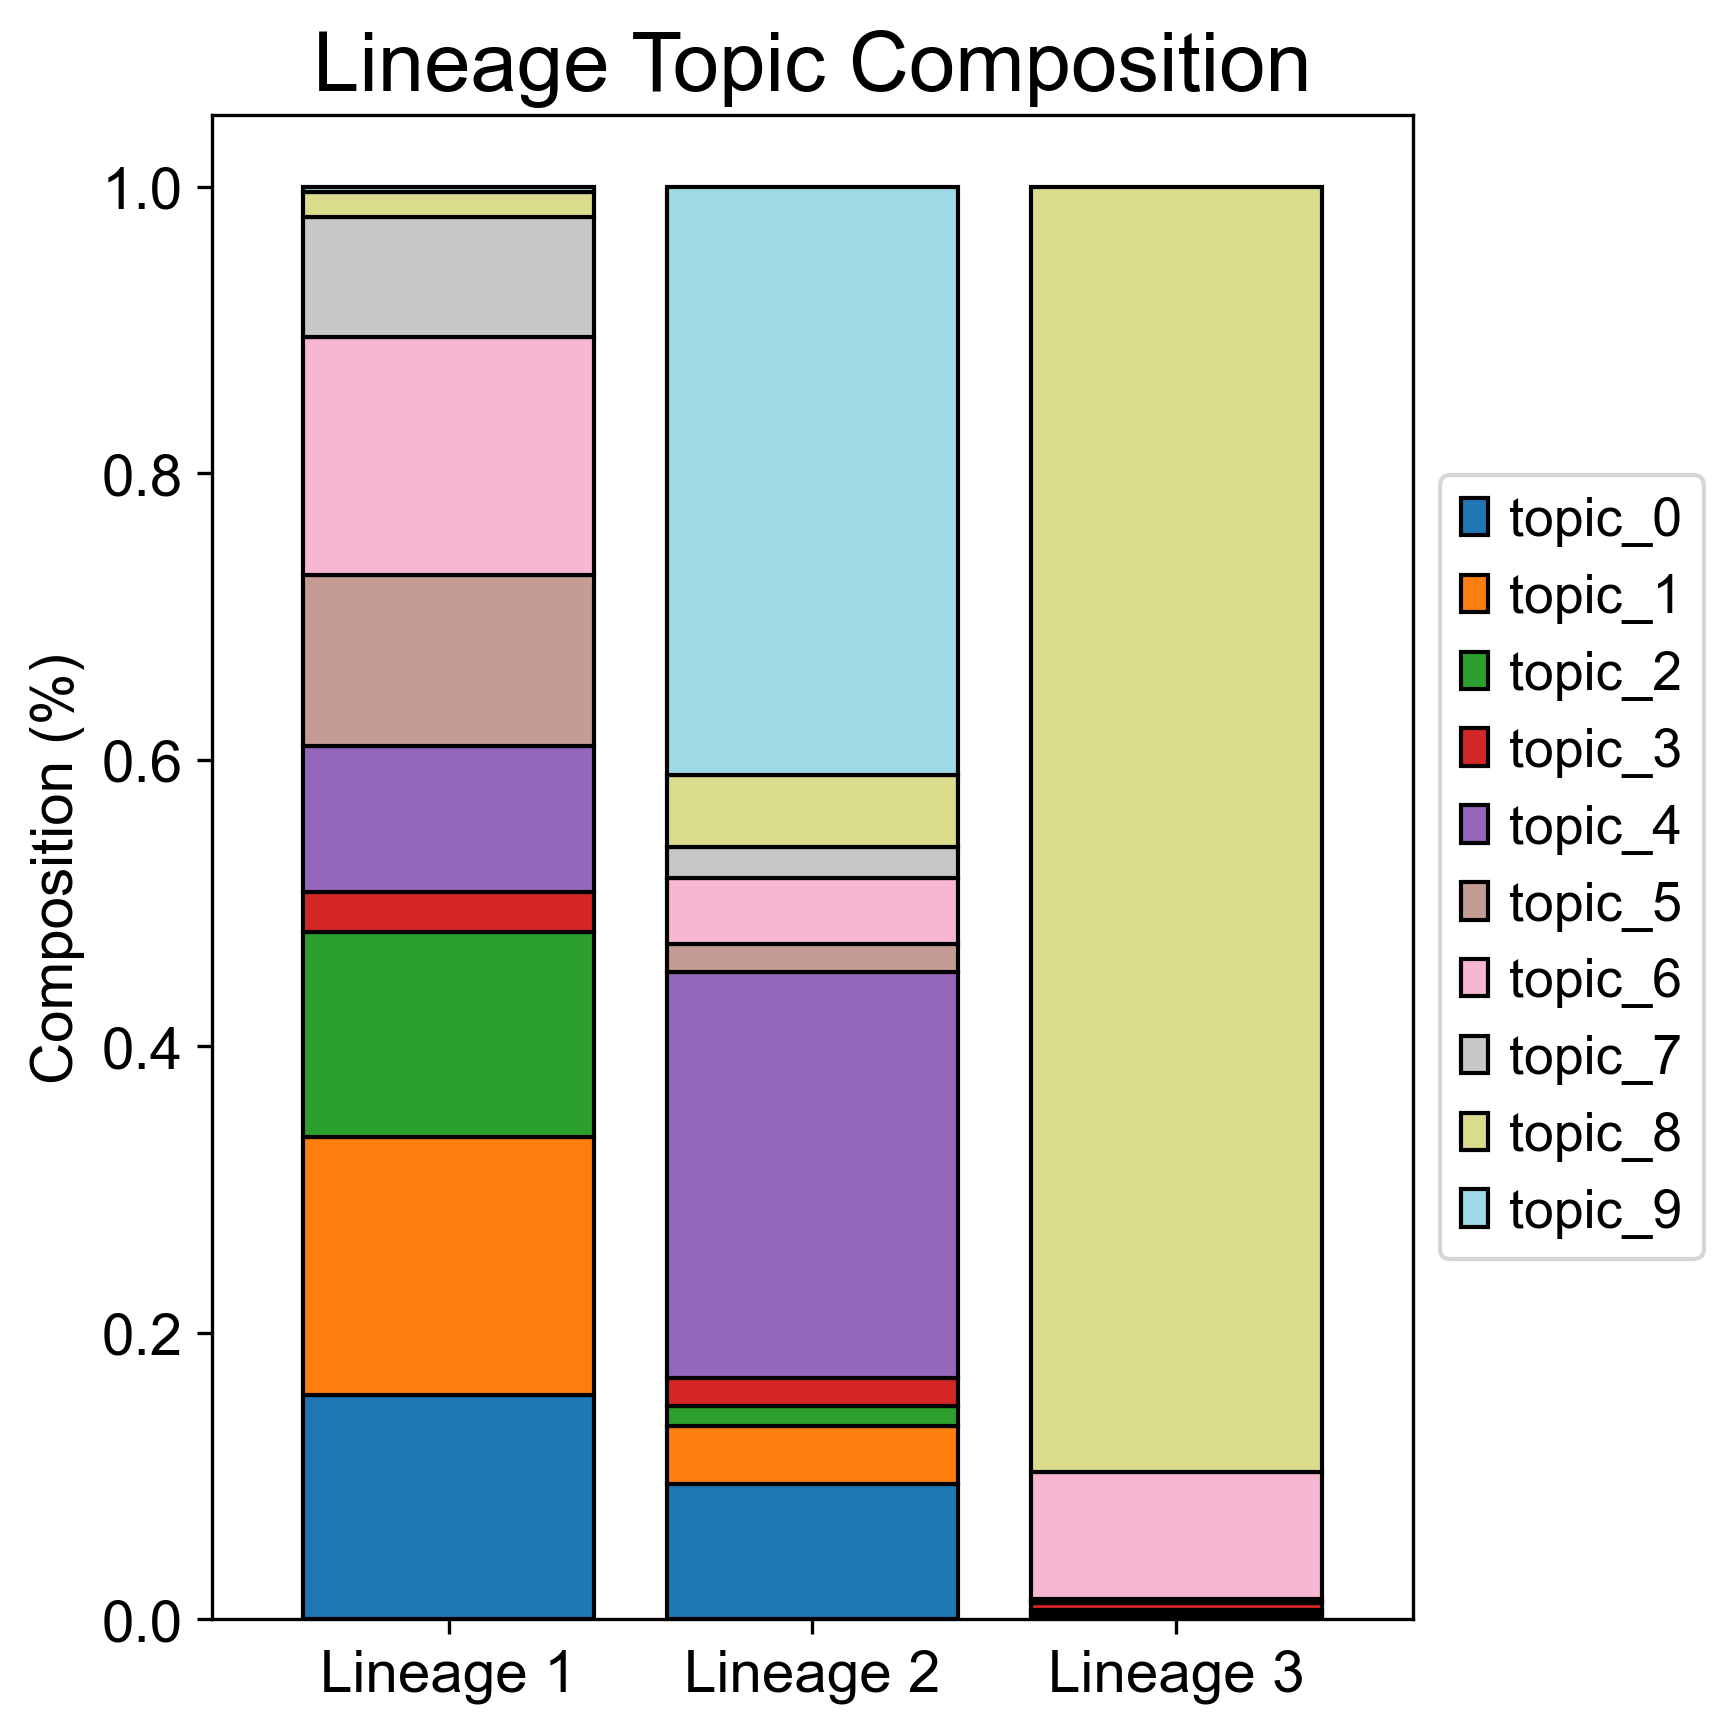

In [25]:
lin_comp_df = pd.DataFrame(obs_df.groupby('lineage')['topic_id'].value_counts(), dtype=int)
lin_comp_df['Lineage'] = lin_comp_df.index.get_level_values(0)
lin_comp_df['Topic'] = lin_comp_df.index.get_level_values(1)

pivot = pd.pivot_table(data=lin_comp_df, index=['Lineage'], columns=['Topic'], values='topic_id')
pivot_freq = pivot.div(pivot.sum(axis=1), axis=0)
ax = pivot_freq.plot.bar(stacked=True, cmap='tab20', figsize=(6,6), grid=False, width=0.8,
                        edgecolor='black')

ax.set_title('Lineage Topic Composition', fontsize=20)
ax.set_xticklabels(['Lineage 1','Lineage 2','Lineage 3'], rotation=0)
ax.set_xlabel('')
ax.set_ylabel('Composition (%)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.savefig('Single_Cell/MIRA/figures/Lineage_topic_compositions.pdf')

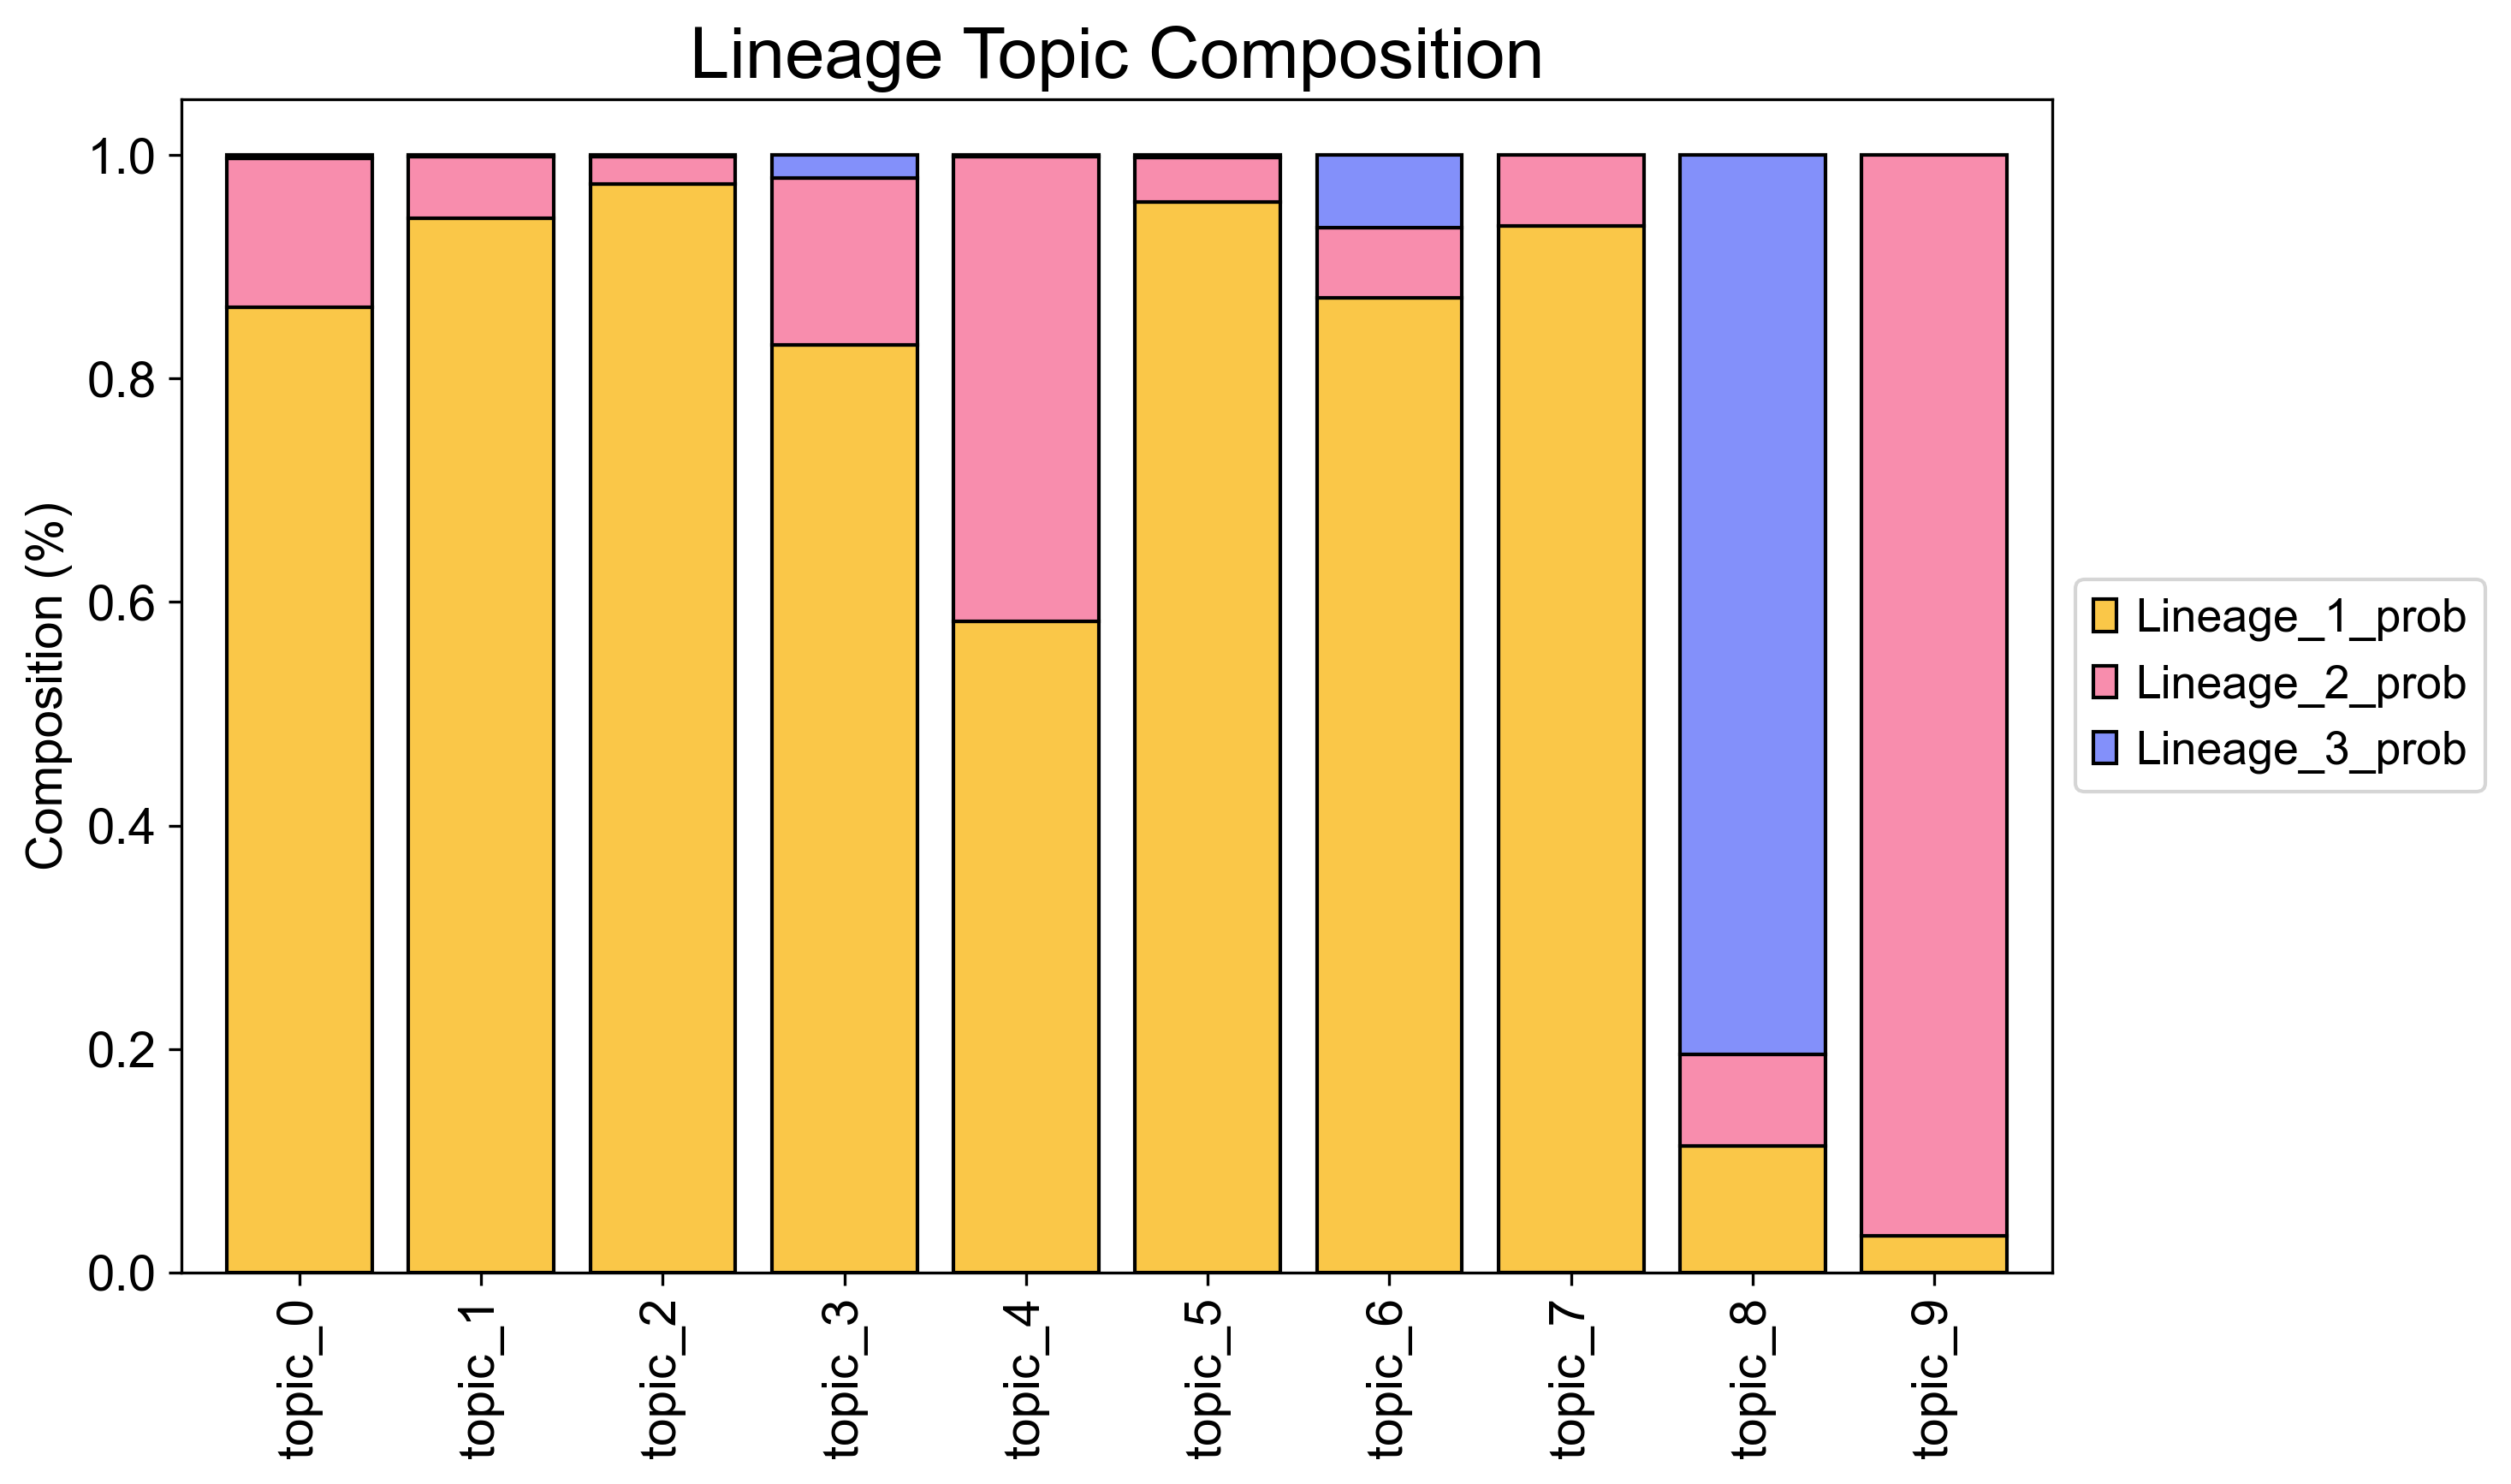

In [26]:
lin_comp_df = pd.DataFrame(obs_df.groupby('lineage')['topic_id'].value_counts(), dtype=int)
lin_comp_df['Lineage'] = lin_comp_df.index.get_level_values(0)
lin_comp_df['Topic'] = lin_comp_df.index.get_level_values(1)

pivot = pd.pivot_table(data=lin_comp_df, index=['Topic'], columns=['Lineage'], values='topic_id')
pivot_freq = pivot.div(pivot.sum(axis=1), axis=0)
ax = pivot_freq.plot.bar(stacked=True, 
                         color=['#FAC748','#F88DAD','#8390FA'], figsize=(10,6), grid=False,  width=0.8,
                        edgecolor='black')

ax.set_title('Lineage Topic Composition', fontsize=20)
#ax.set_xticklabels(['Lineage 1','Lineage 2','Lineage 3'], rotation=0)
ax.set_xlabel('')
ax.set_ylabel('Composition (%)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.savefig('Single_Cell/MIRA/figures/Topic_lineage_compositions.png')

- Topic 8 seems to be specific to lineage 3
- Topic 9 seems to be specific to lineage 2

In [15]:
#topic 8 and topic 9 gene set enrichments
model = mira.topics.ExpressionTopicModel.load('Single_Cell/MIRA/RNA_topic_model_HSC_only_T21_healthy.pth')
model.predict(rna)

INFO:mira.topic_model.base:Moving model to CPU for inference.
INFO:mira.topic_model.base:Moving model to device: cpu


Predicting latent vars:   0%|          | 0/13 [00:00<?, ?it/s]

INFO:mira.adata_interface.core:Added key to obsm: X_topic_compositions
INFO:mira.adata_interface.topic_model:Added cols: topic_0, topic_1, topic_2, topic_3, topic_4, topic_5, topic_6, topic_7, topic_8, topic_9
INFO:mira.adata_interface.core:Added key to varm: topic_feature_compositions
INFO:mira.adata_interface.core:Added key to varm: topic_feature_activations
INFO:mira.adata_interface.topic_model:Added key to uns: topic_dendogram


In [16]:
sc.set_figure_params(scanpy=True, dpi=300, dpi_save=300, 
                          fontsize=14, figsize=(10,10))

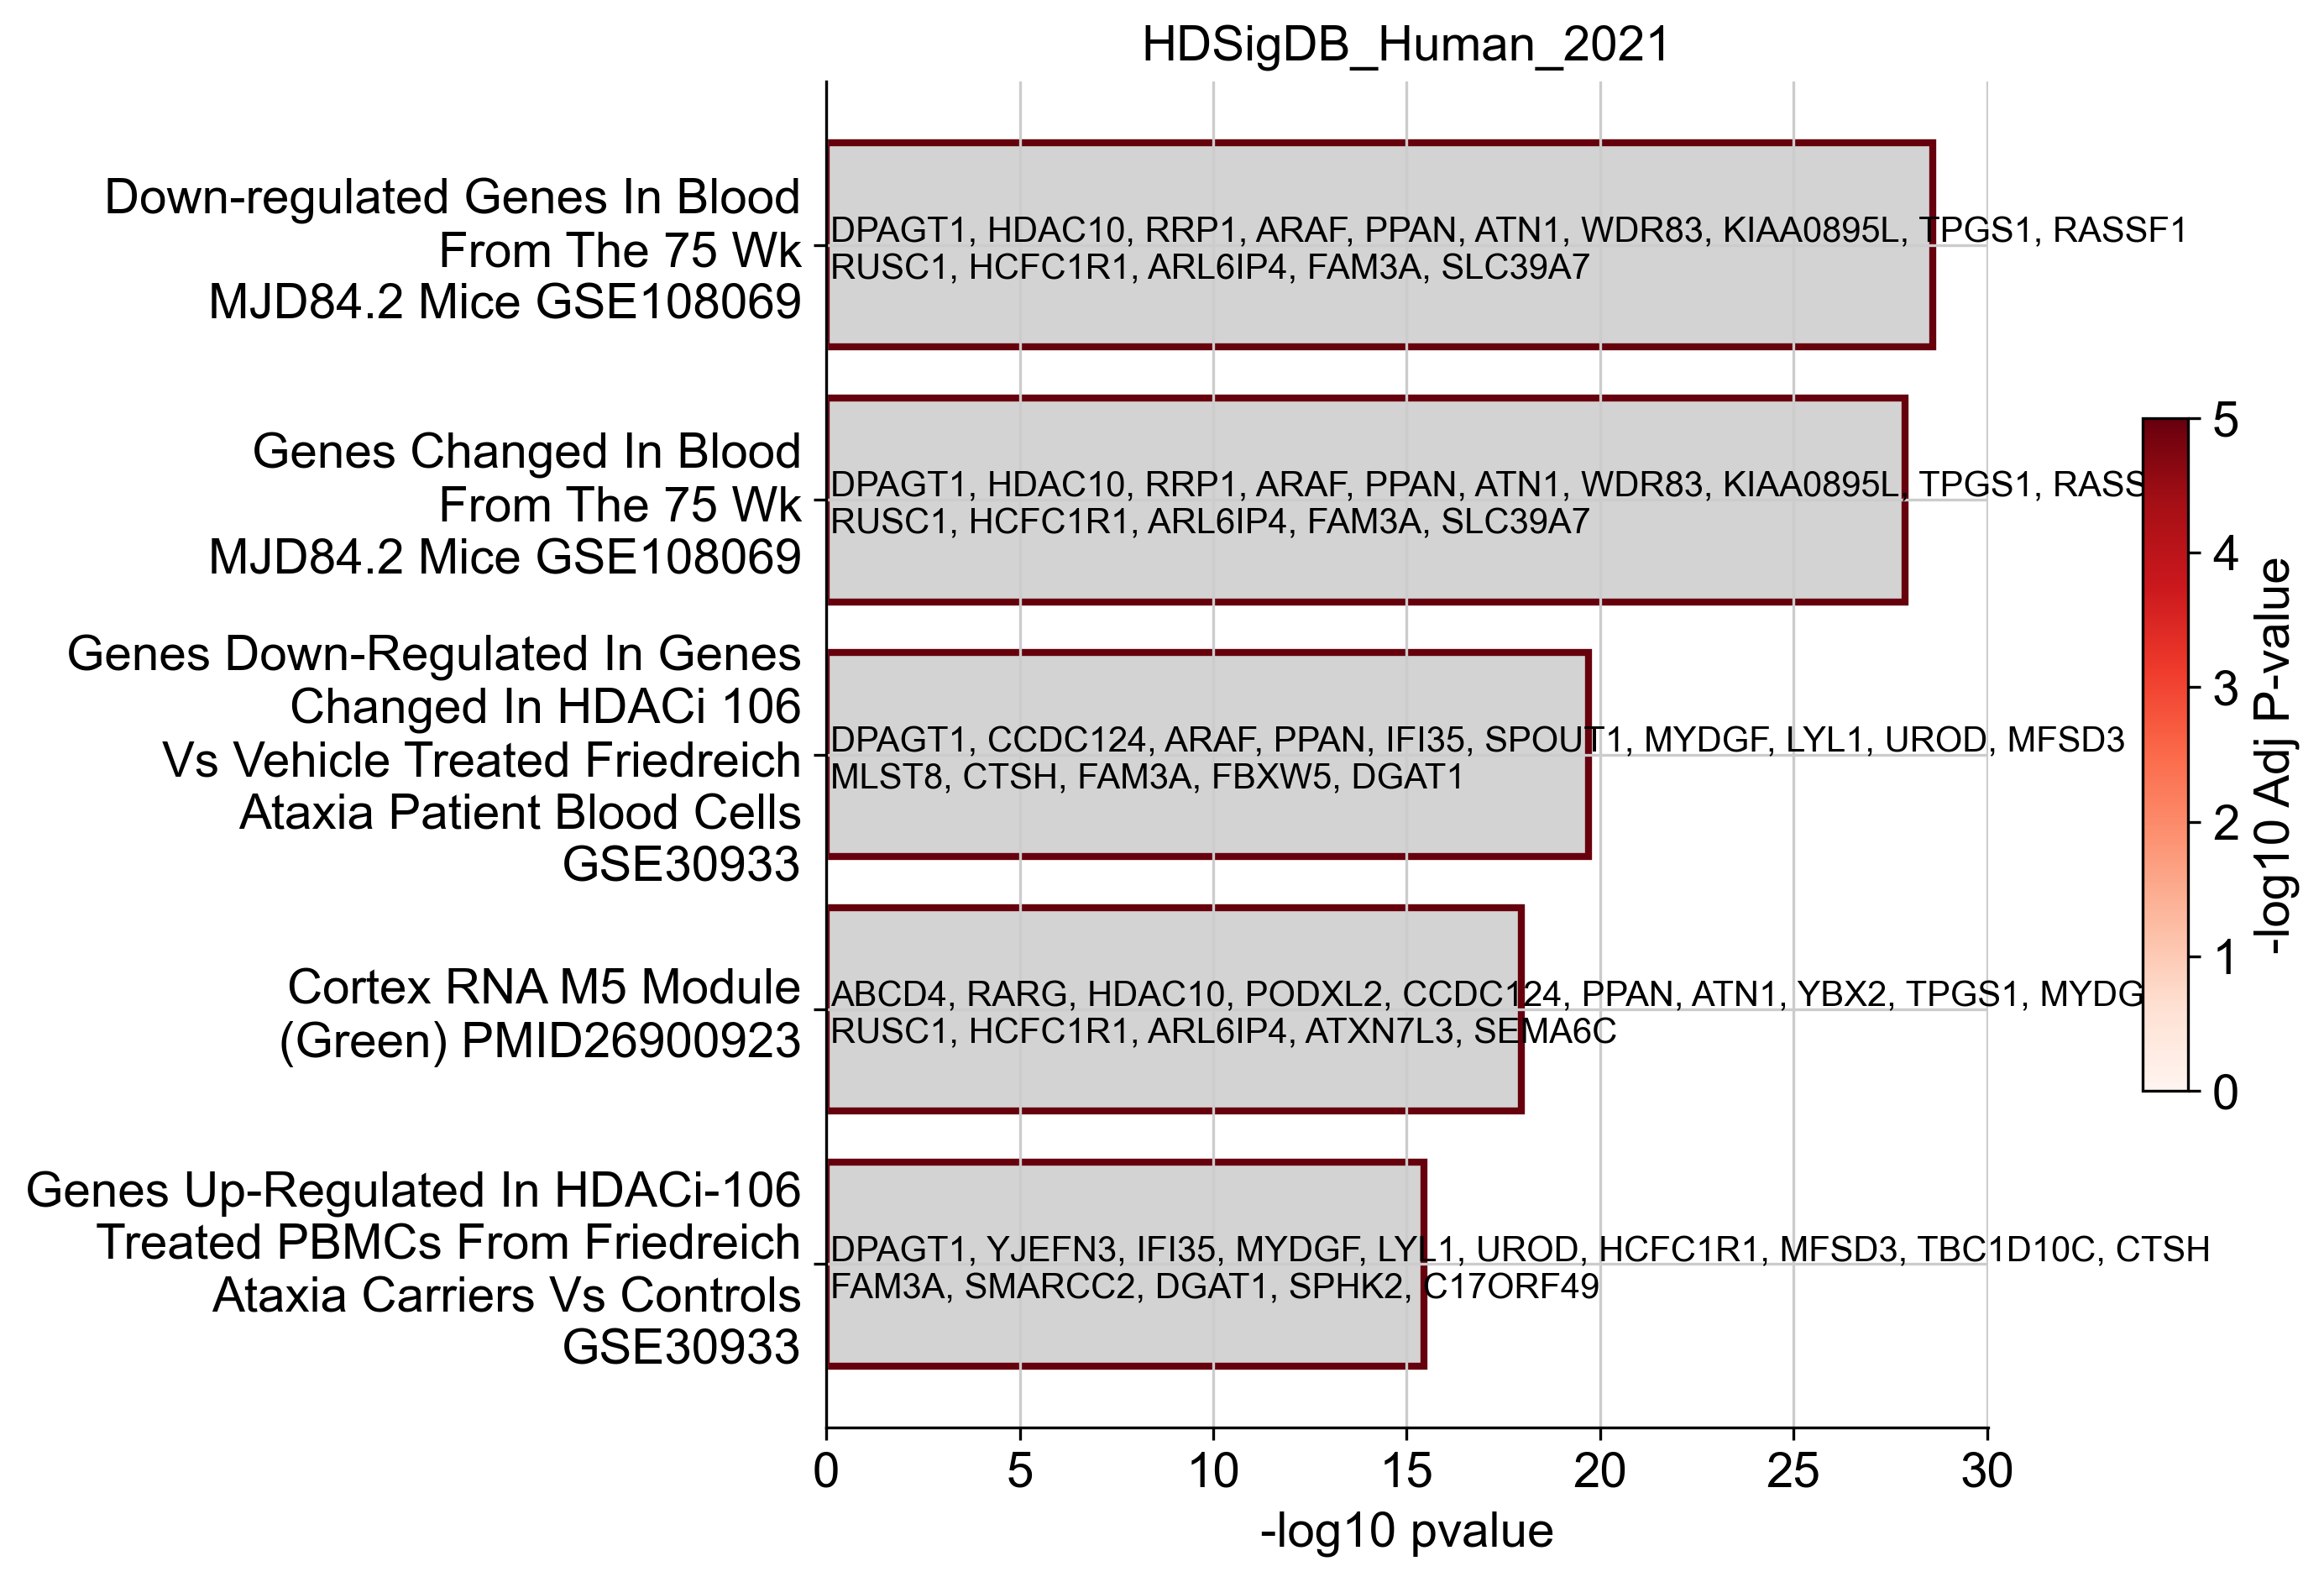

In [21]:
#select the genes associated with a specific topic of interest 
topic = 8
model.post_topic(topic, top_n=200)
#perform GSEA enrichment on that topic 
model.rank_genes(topic)
model.fetch_topic_enrichments(topic, ontologies= ['HDSigDB_Human_2021'])
model.plot_enrichments(topic, show_top=5, plots_per_row=1,show_genes=True, max_genes = 15, height = 6.5, aspect=1.5)
plt.savefig('Single_Cell/MIRA/figures/Topic_8.pdf')

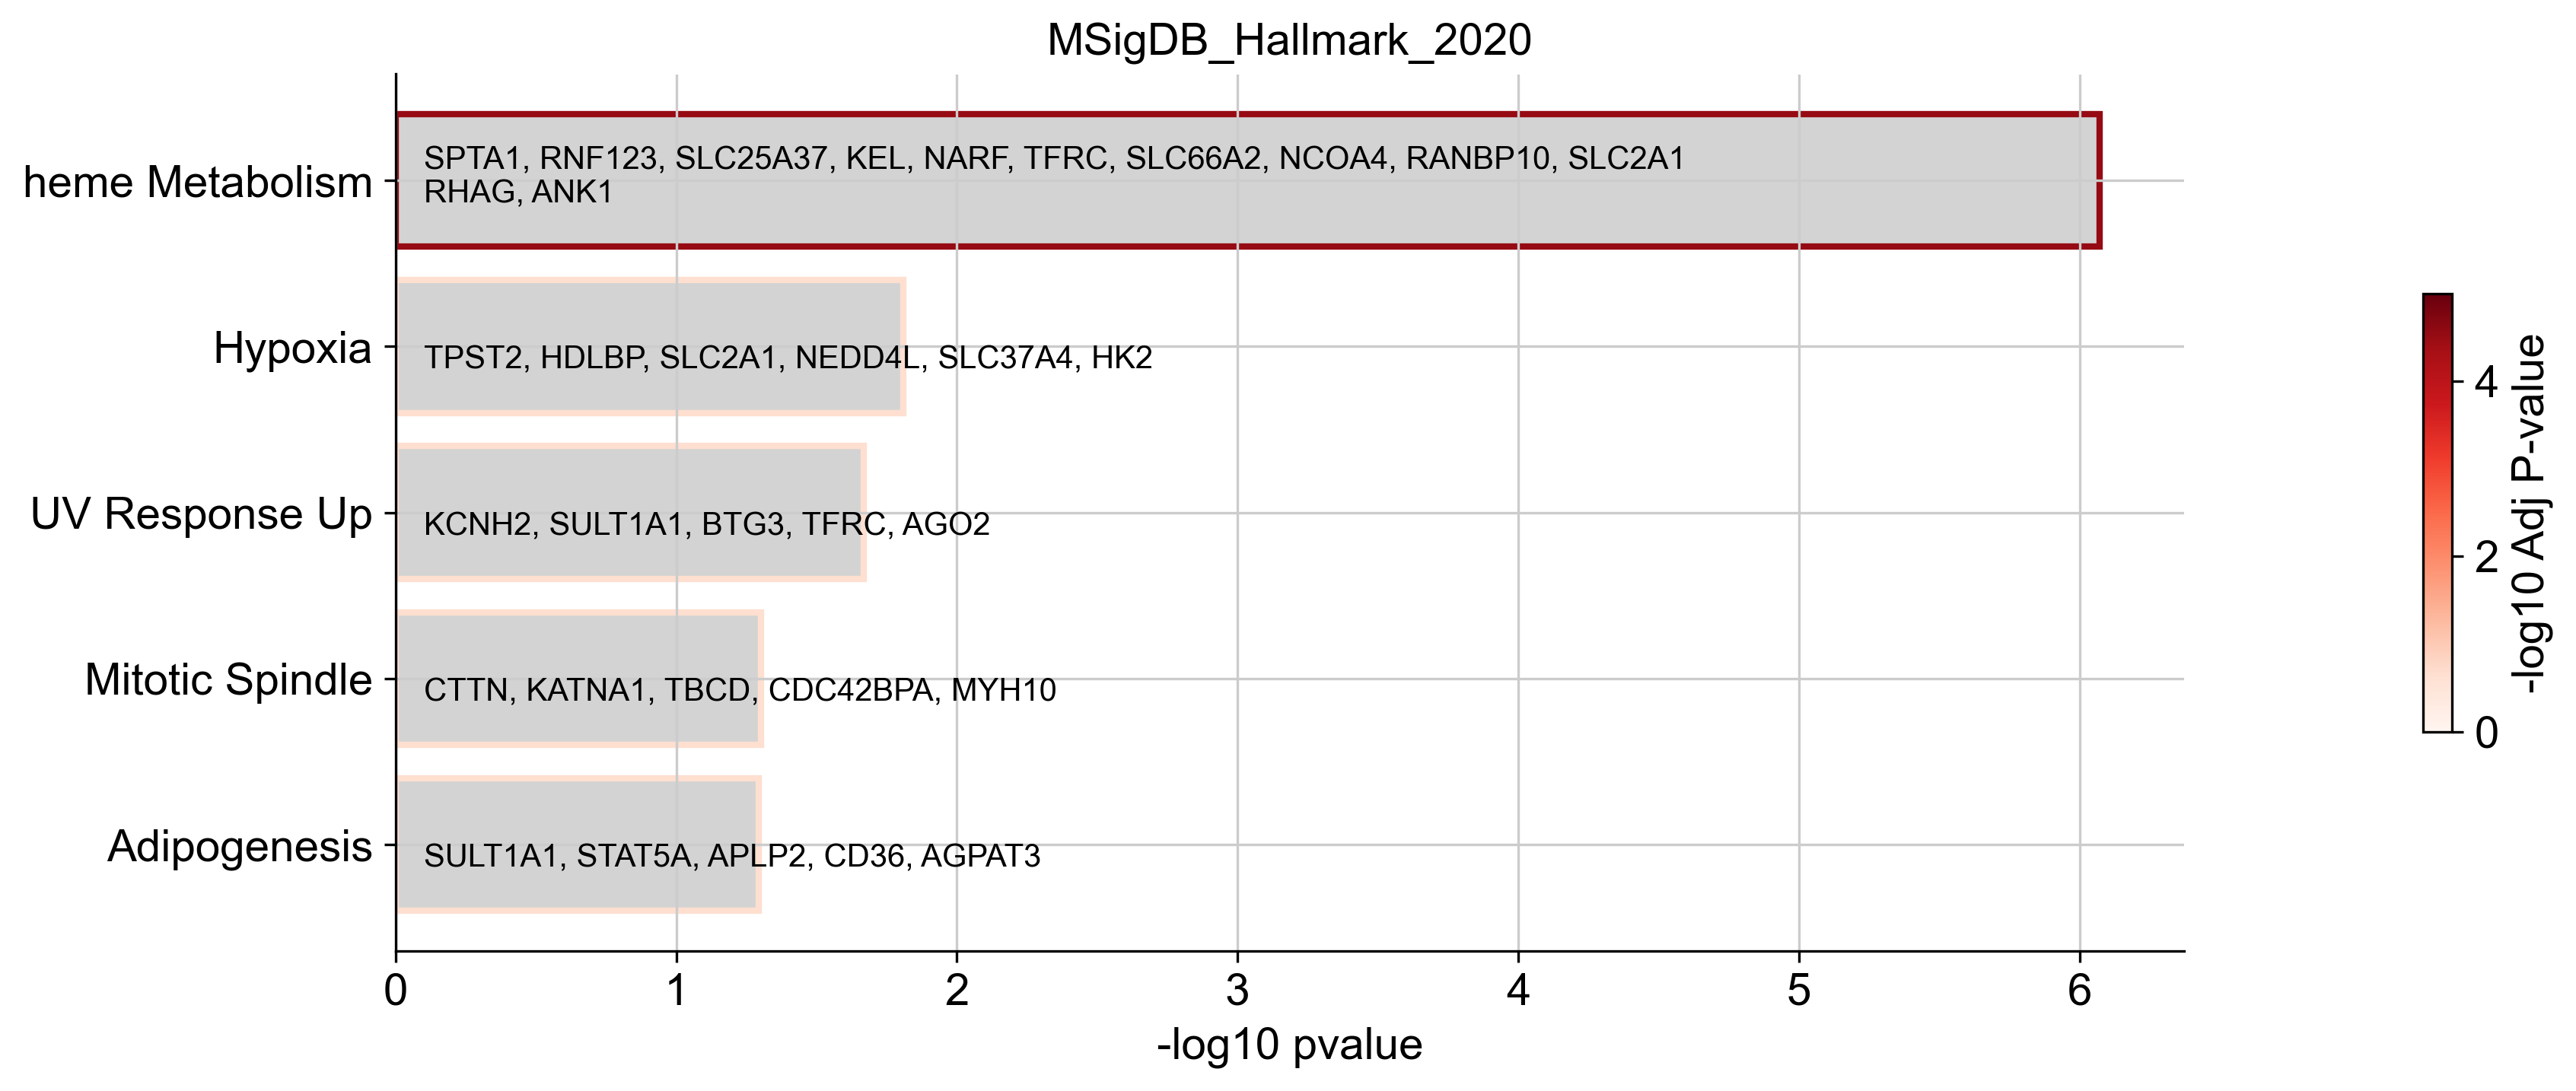

In [19]:
#select the genes associated with a specific topic of interest 
topic = 9
model.post_topic(topic, top_n=200)
#perform GSEA enrichment on that topic 
model.rank_genes(topic)
model.fetch_topic_enrichments(topic, ontologies= ['MSigDB_Hallmark_2020'])
model.plot_enrichments(topic, show_top=5, plots_per_row=2, show_genes=True, max_genes = 50, height = 5)
plt.savefig('Single_Cell/MIRA/figures/Topic_9.png')

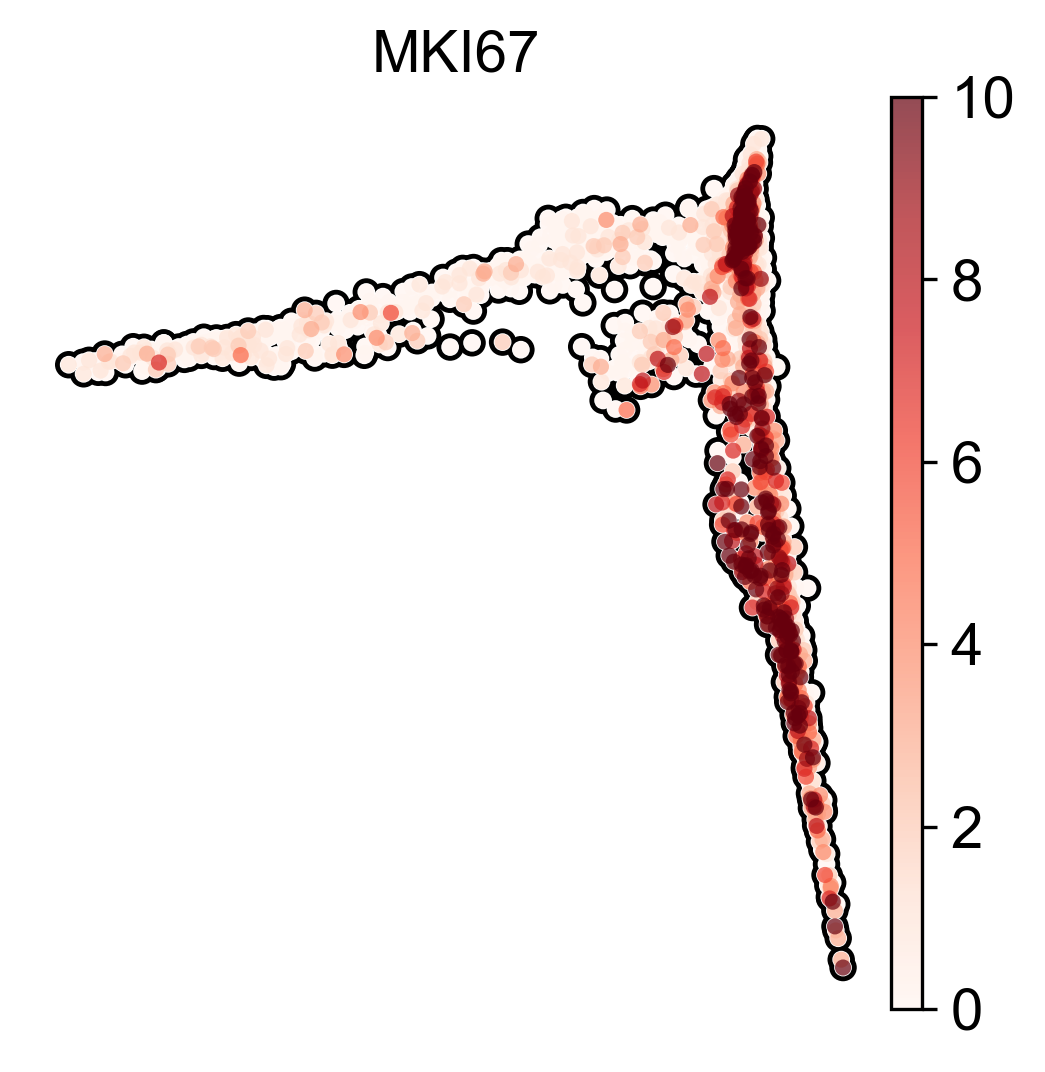

In [13]:
#plot MKI67 expression in the UMAP
sc.set_figure_params(dpi=300, dpi_save=400)
fig = sc.pl.umap(rna, color = 'MKI67', layer='counts',vmin = 0, vmax = 'p97',return_fig=True,
          color_map='Reds', frameon=False, add_outline=True, size = 60)
plt.savefig('Single_Cell/MIRA/figures/MKI67.pdf')

In [256]:
topic_genes = pd.DataFrame()
topic_genes['Topic 9'] = model.get_top_genes(9, 200)
topic_genes['Topic 8'] = model.get_top_genes(8, 200)
topic_genes.to_csv('Single_Cell/MIRA/figures/topic_8_and_9_genes.csv')
topic_genes

Topic 9   Topic 8
0    SNRNP200      PPAN
1      RNF130      CHKB
2       PLCG1     MYDGF
3        CPVL    POU6F1
4      PIK3CB  LEF1-AS1
..        ...       ...
195   ZNF385D     NAPRT
196    CNKSR3      NME4
197    CFAP69   FAM193B
198   ST3GAL2   ATXN7L3
199    PTPRN2     MLST8

[200 rows x 2 columns]

# Lineage assignment and TF drivers

In [ ]:
#data with lineage information to build lineage tree graphs
data = anndata.read_h5ad('Single_Cell/Joint_representation_HSCs.lineages.pseudotime.h5ad')
data

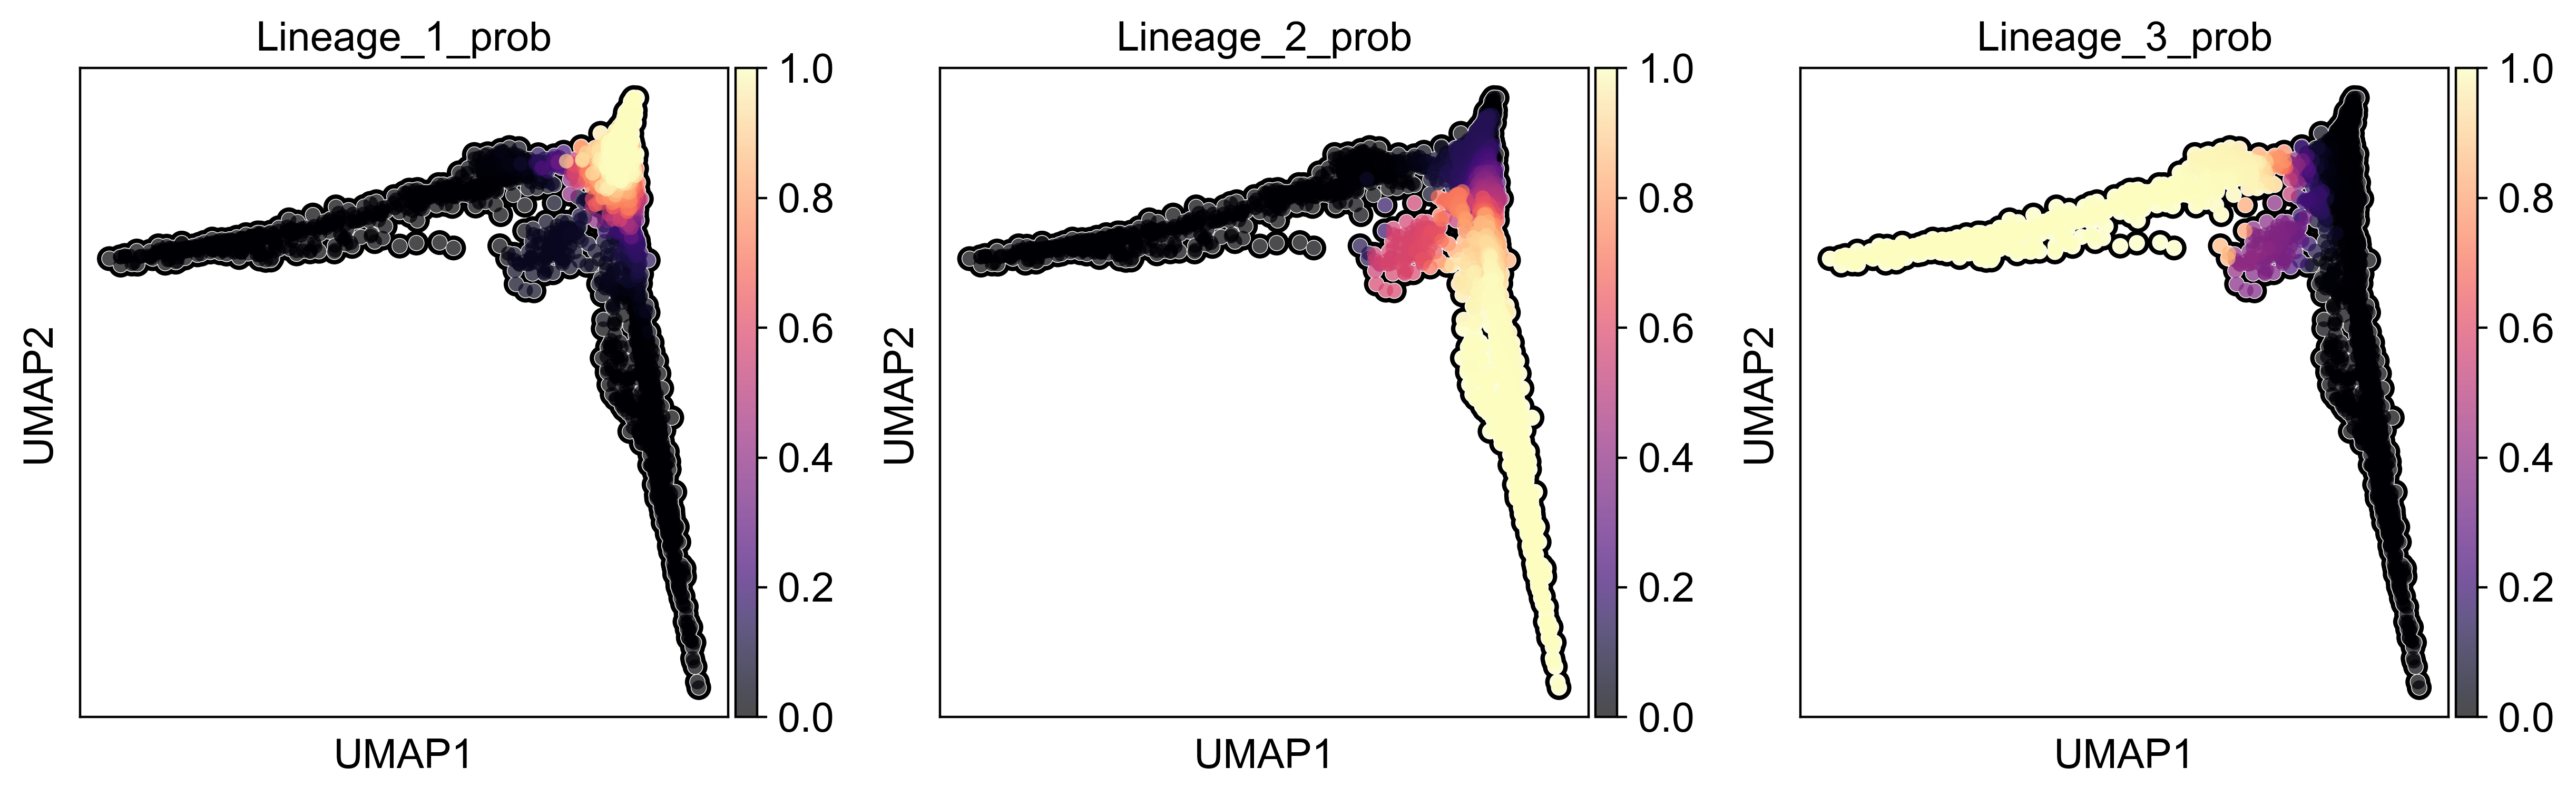

In [21]:
sc.set_figure_params(dpi=400)
fig = sc.pl.umap(data,size=100,add_outline=True,
   color = [x + '_prob' for x in data.uns['lineage_names']],
   color_map='magma', return_fig=True)

plt.savefig('Single_Cell/MIRA/figures/lineage_probability.pdf')


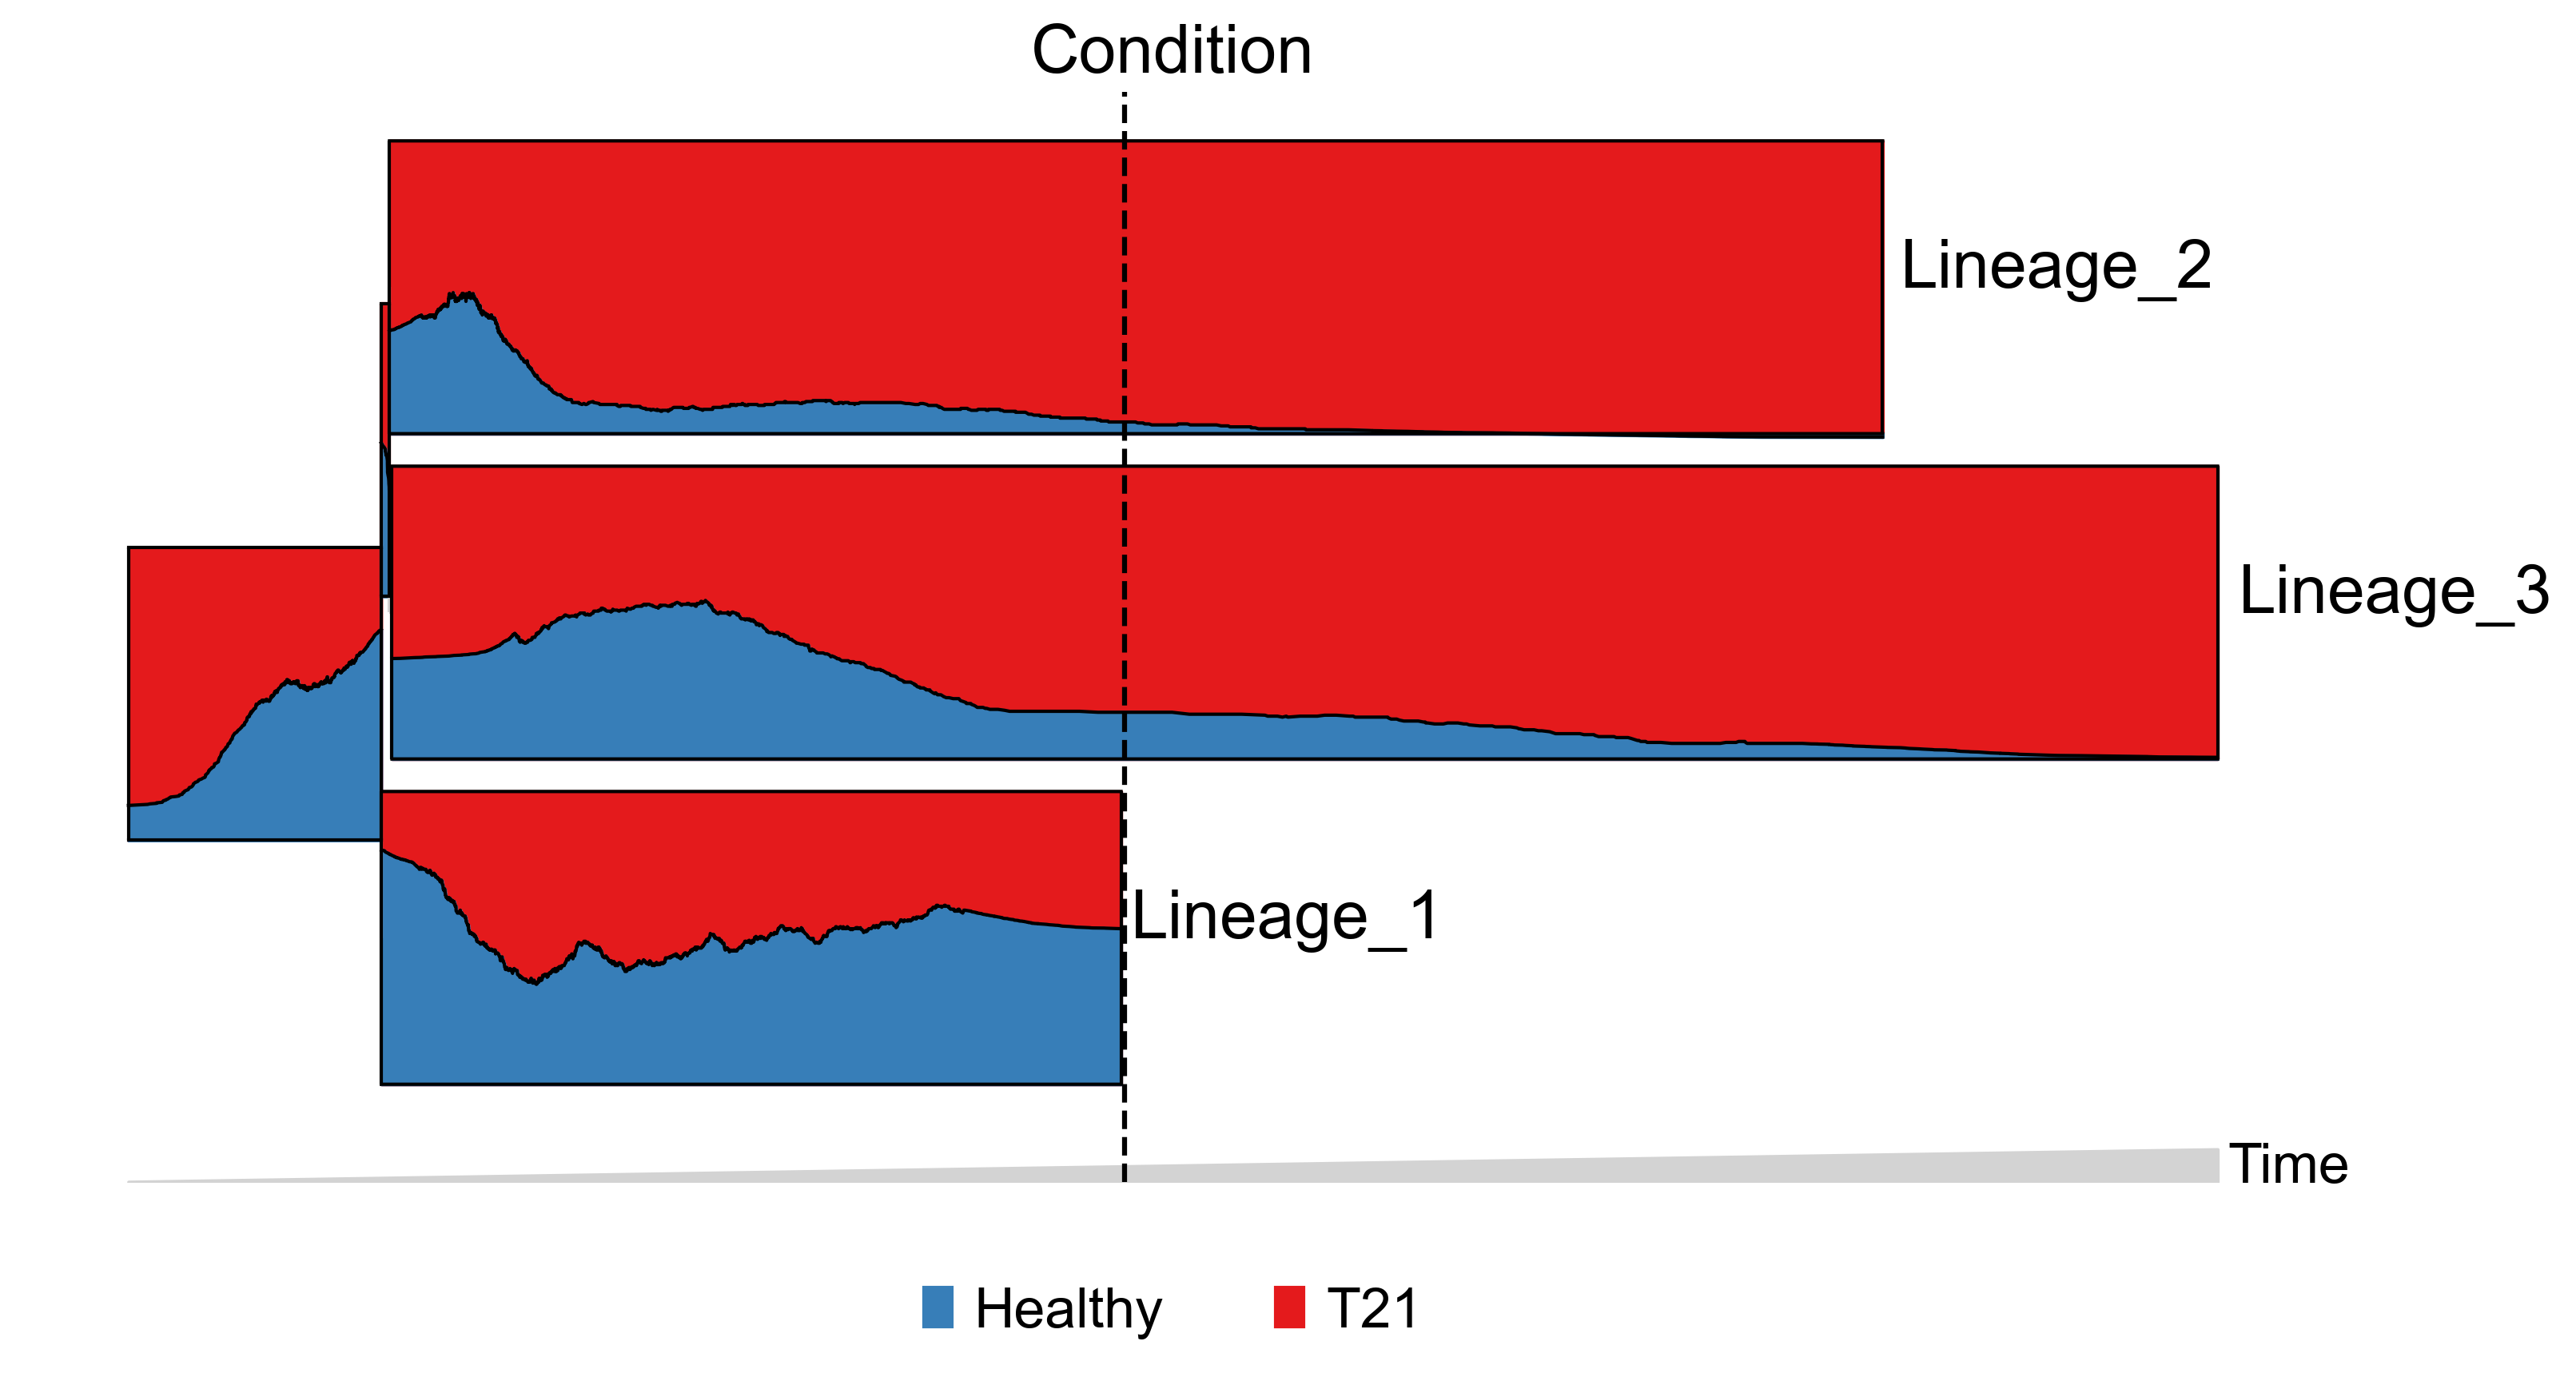

In [14]:
#plot proportion of T21 and healthy cells, smoothing is controlled by the window size parameter
plot_kwargs = dict(hide_feature_threshold=0.03, linewidth=1, max_bar_height=0.9,
                     legend_cols=4, figsize = (11,6), log_pseudotime=False)


data.obs['Healthy'] = [1.0 if x=='Healthy' else 0.0 for x in data.obs['sample']]
data.obs['T21'] = [1.0 if x=='T21' else 0.0 for x in data.obs['sample']]

mira.pl.plot_stream(data,
                    scaffold_linewidth=1,
                    window_size = 301,
                    data = ['Healthy', 'T21'],
                    title = 'Condition',
                    palette=['#377EB8','#E41A1C'],
                    **plot_kwargs)

plt.axvline(x = 4.89, color = 'black', ls='--', )
plt.savefig('Single_Cell/MIRA/figures/Condition_stream.pdf')


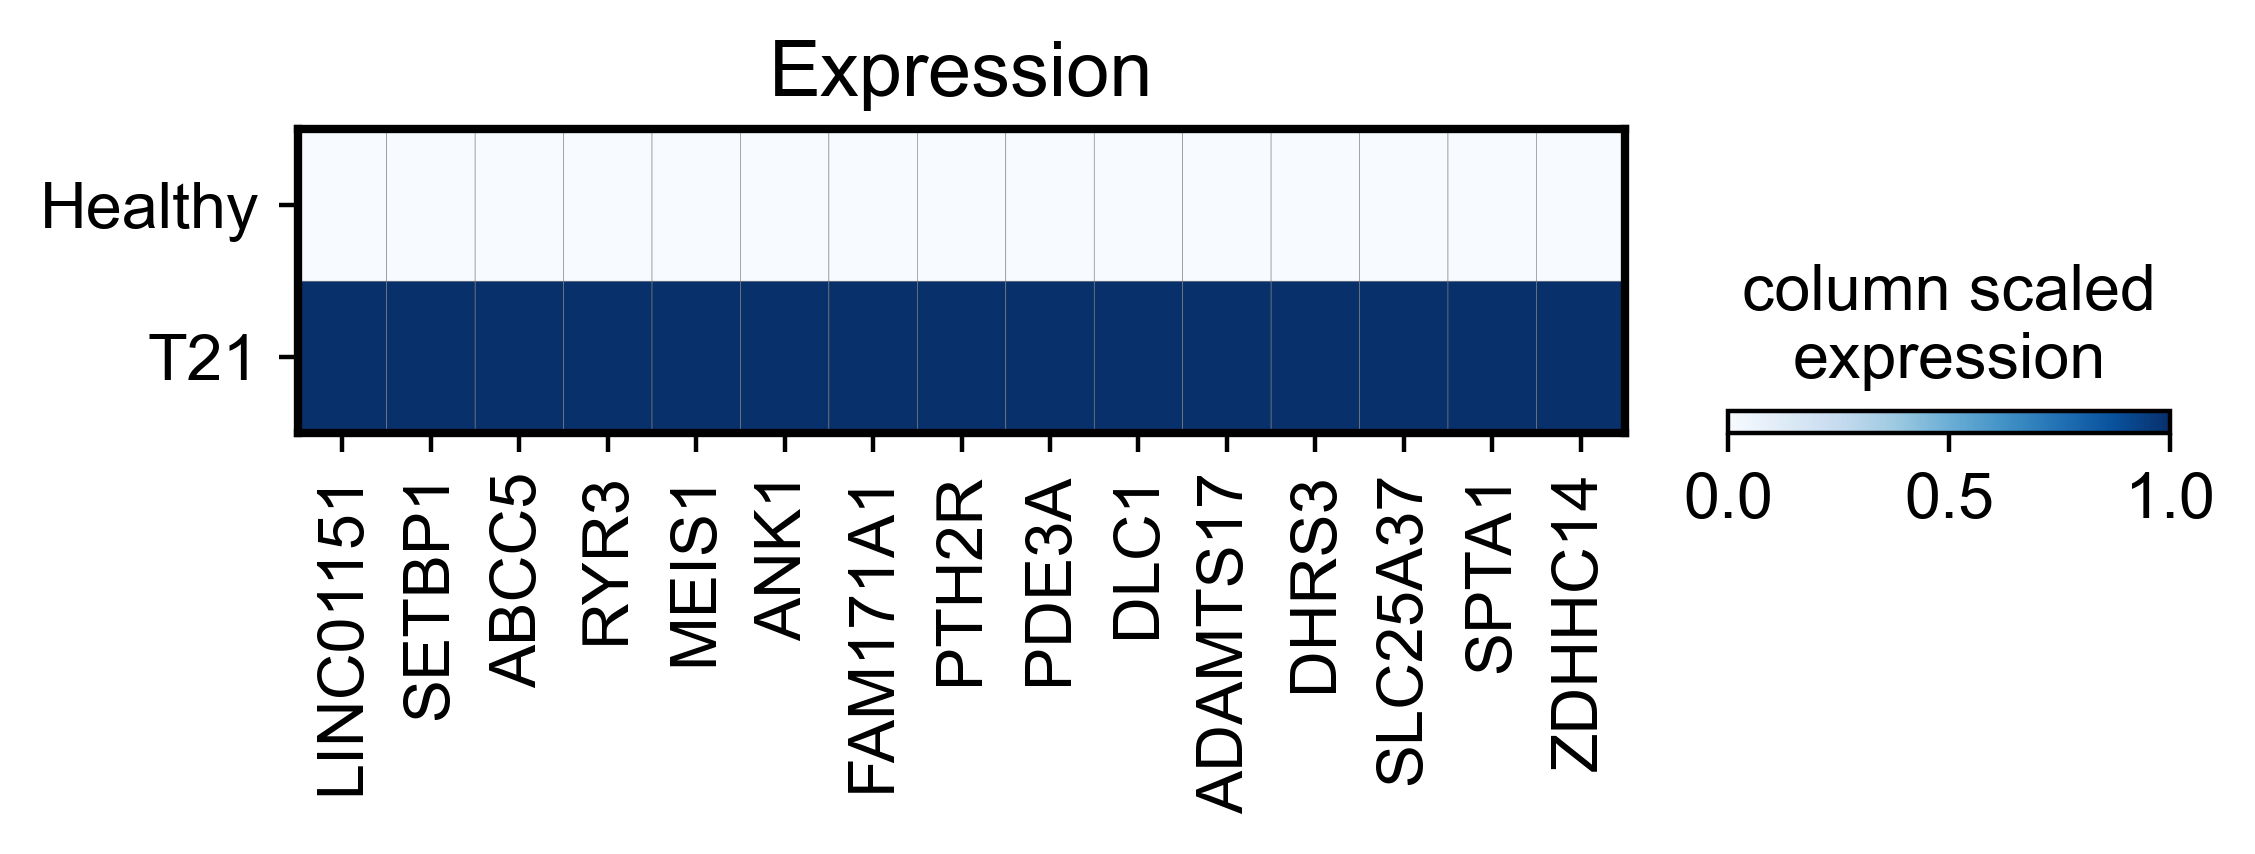

<Figure size 1600x1600 with 0 Axes>

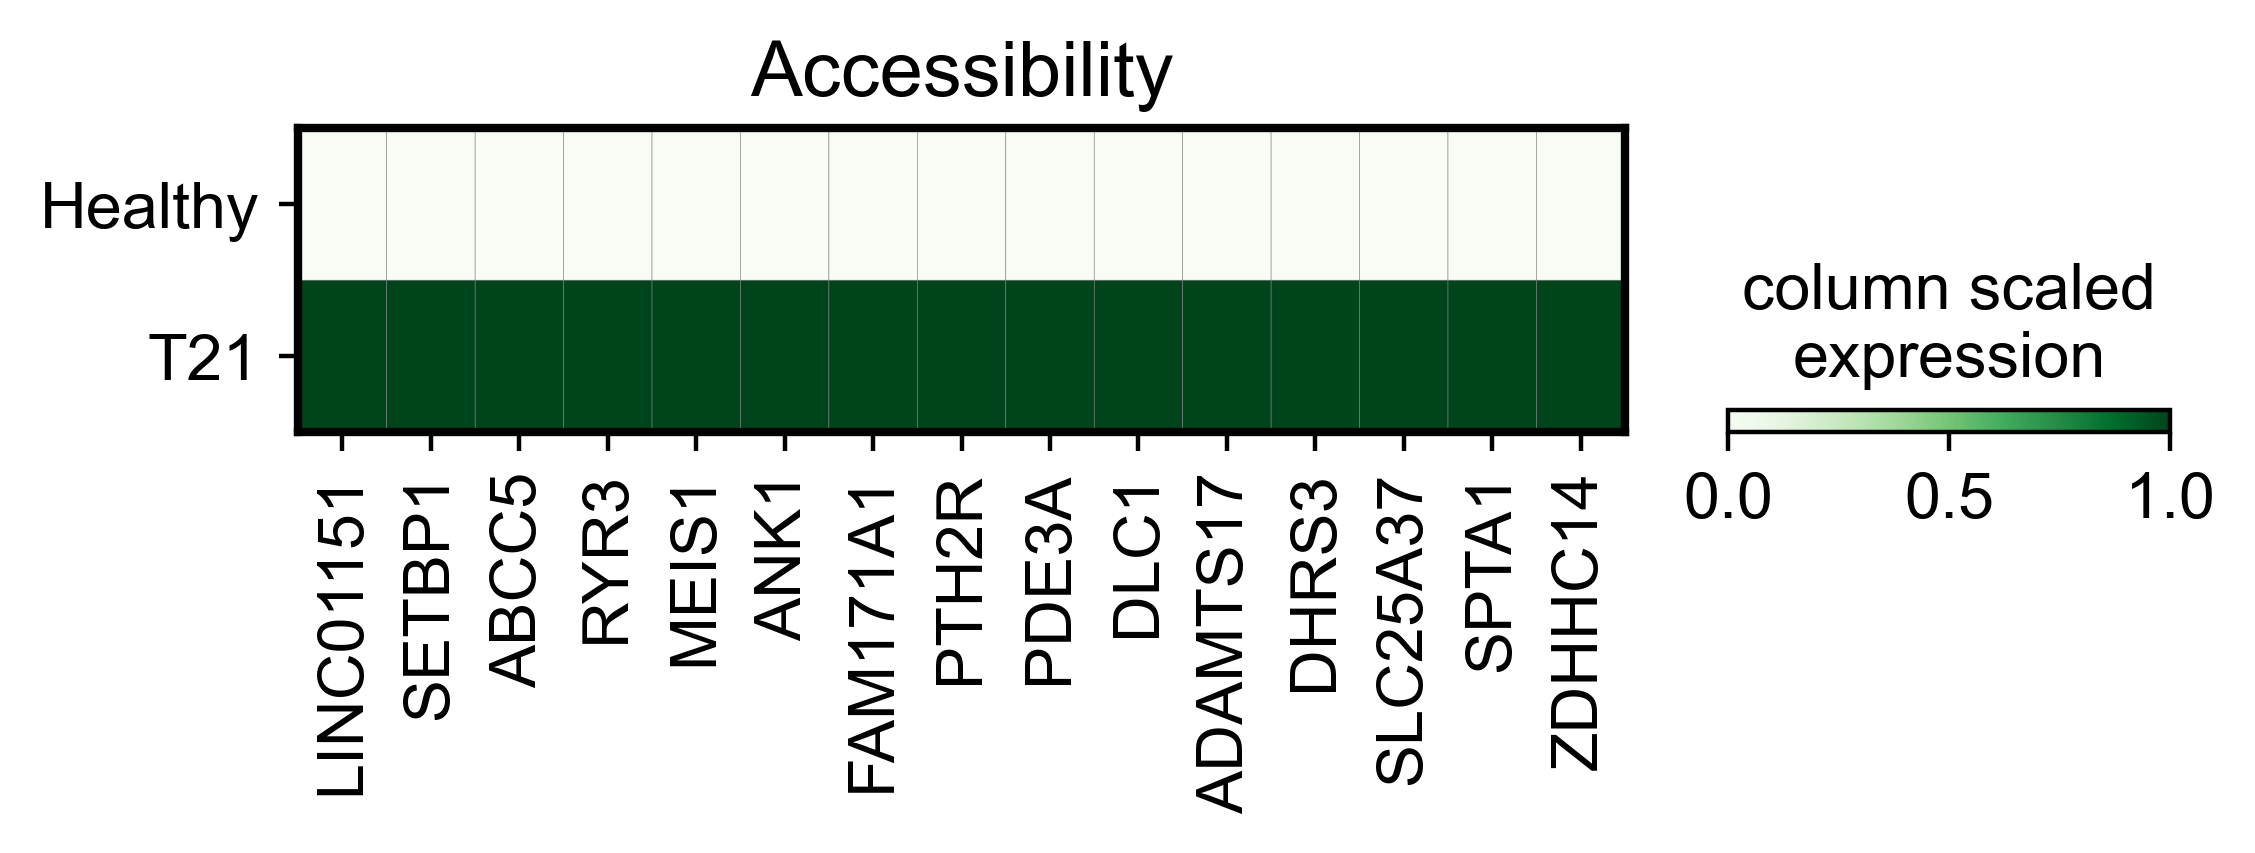

<Figure size 1600x1600 with 0 Axes>

In [27]:
#note that this is a relative comparison
gata_list = ['LINC01151', 'SETBP1', 'ABCC5', 'RYR3', 'MEIS1',
            'ANK1', 'FAM171A1', 'PTH2R', 'PDE3A',
            'DLC1', 'ADAMTS17', 'DHRS3',
             'SLC25A37', 'SPTA1','ZDHHC14'
            ]
sc.set_figure_params(dpi=400, dpi_save=400)

mp = sc.pl.matrixplot(rna, gata_list, groupby='sample', layer='X_norm',figsize=(6,1),title='Expression',
                       save='hsc_genes.pdf',
                 cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression')
plt.savefig('Single_Cell/MIRA/figures/expression_cis_regulation.pdf')


fig = sc.pl.matrixplot(rna, gata_list, groupby='sample', layer='LITE_prediction',figsize=(6,1),title='Accessibility',
                  save='hsc_accessibility.pdf',
                 cmap='Greens', standard_scale='var', colorbar_title='column scaled\nexpression')
plt.savefig('Single_Cell/MIRA/figures/accessibility_cis_regulation.pdf')


Testing factors:   0%|          | 0/468 [00:00<?, ?it/s]

Testing factors:   0%|          | 0/468 [00:00<?, ?it/s]

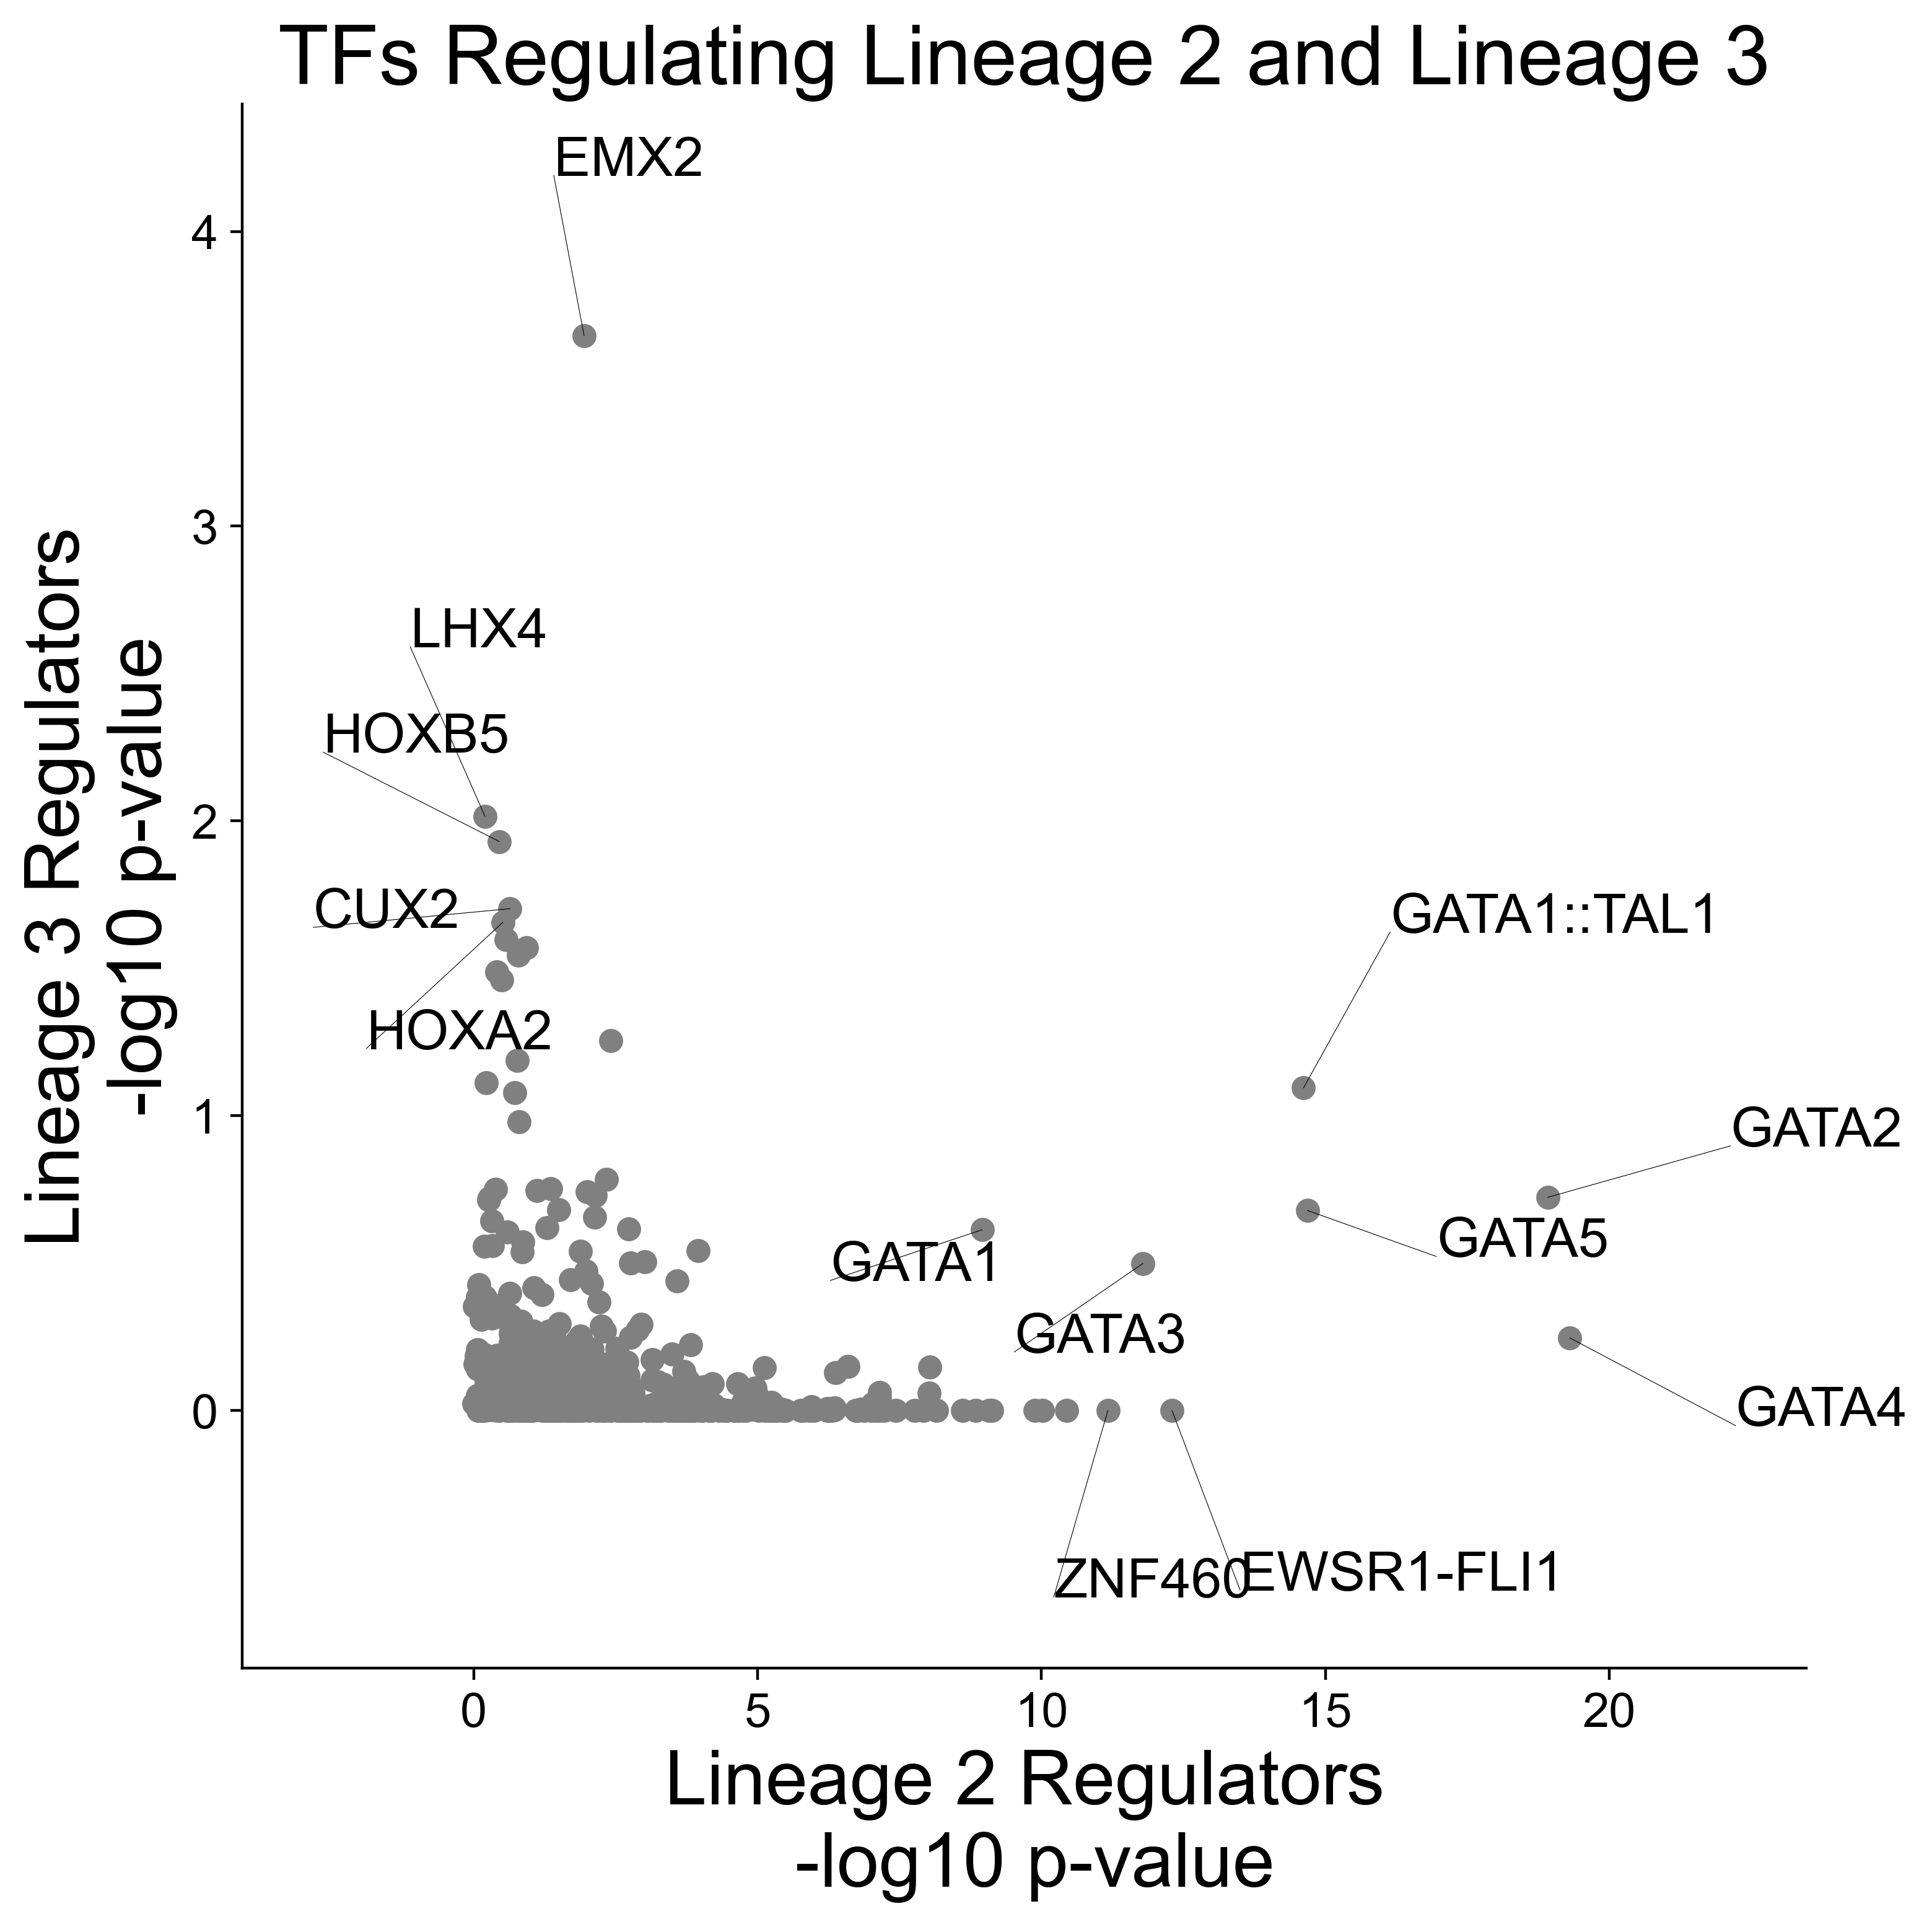

In [24]:
#these are the TF drivers of topic 8 and 9 that are characteristic of lineage 2 and 3 
mira.pl.compare_driver_TFs_plot(rna,
                                geneset1=model.get_top_genes(9, 150),
                                geneset2=model.get_top_genes(8, 150),
                                label_factors=['GATA4','GATA2','GATA5','GATA1','GATA3','HOXB5','EWSR1-FLI1',
                                               'GATA1::TAL1','ZNF460','EMX2','LHX4','CUX2','HOXA2'],
                                fontsize=16, figsize=(8,8), color='grey',
                                )
plt.title('TFs Regulating Lineage 2 and Lineage 3', fontsize=24)
plt.xlabel('Lineage 2 Regulators\n -log10 p-value', fontsize=22)
plt.ylabel('Lineage 3 Regulators\n -log10 p-value', fontsize=22)
plt.grid(b=None)
plt.tight_layout()
plt.savefig('Single_Cell/MIRA/figures/pISD_TF_regualtors_diferentiation_arms.pdf', dpi=300)
plt.show()

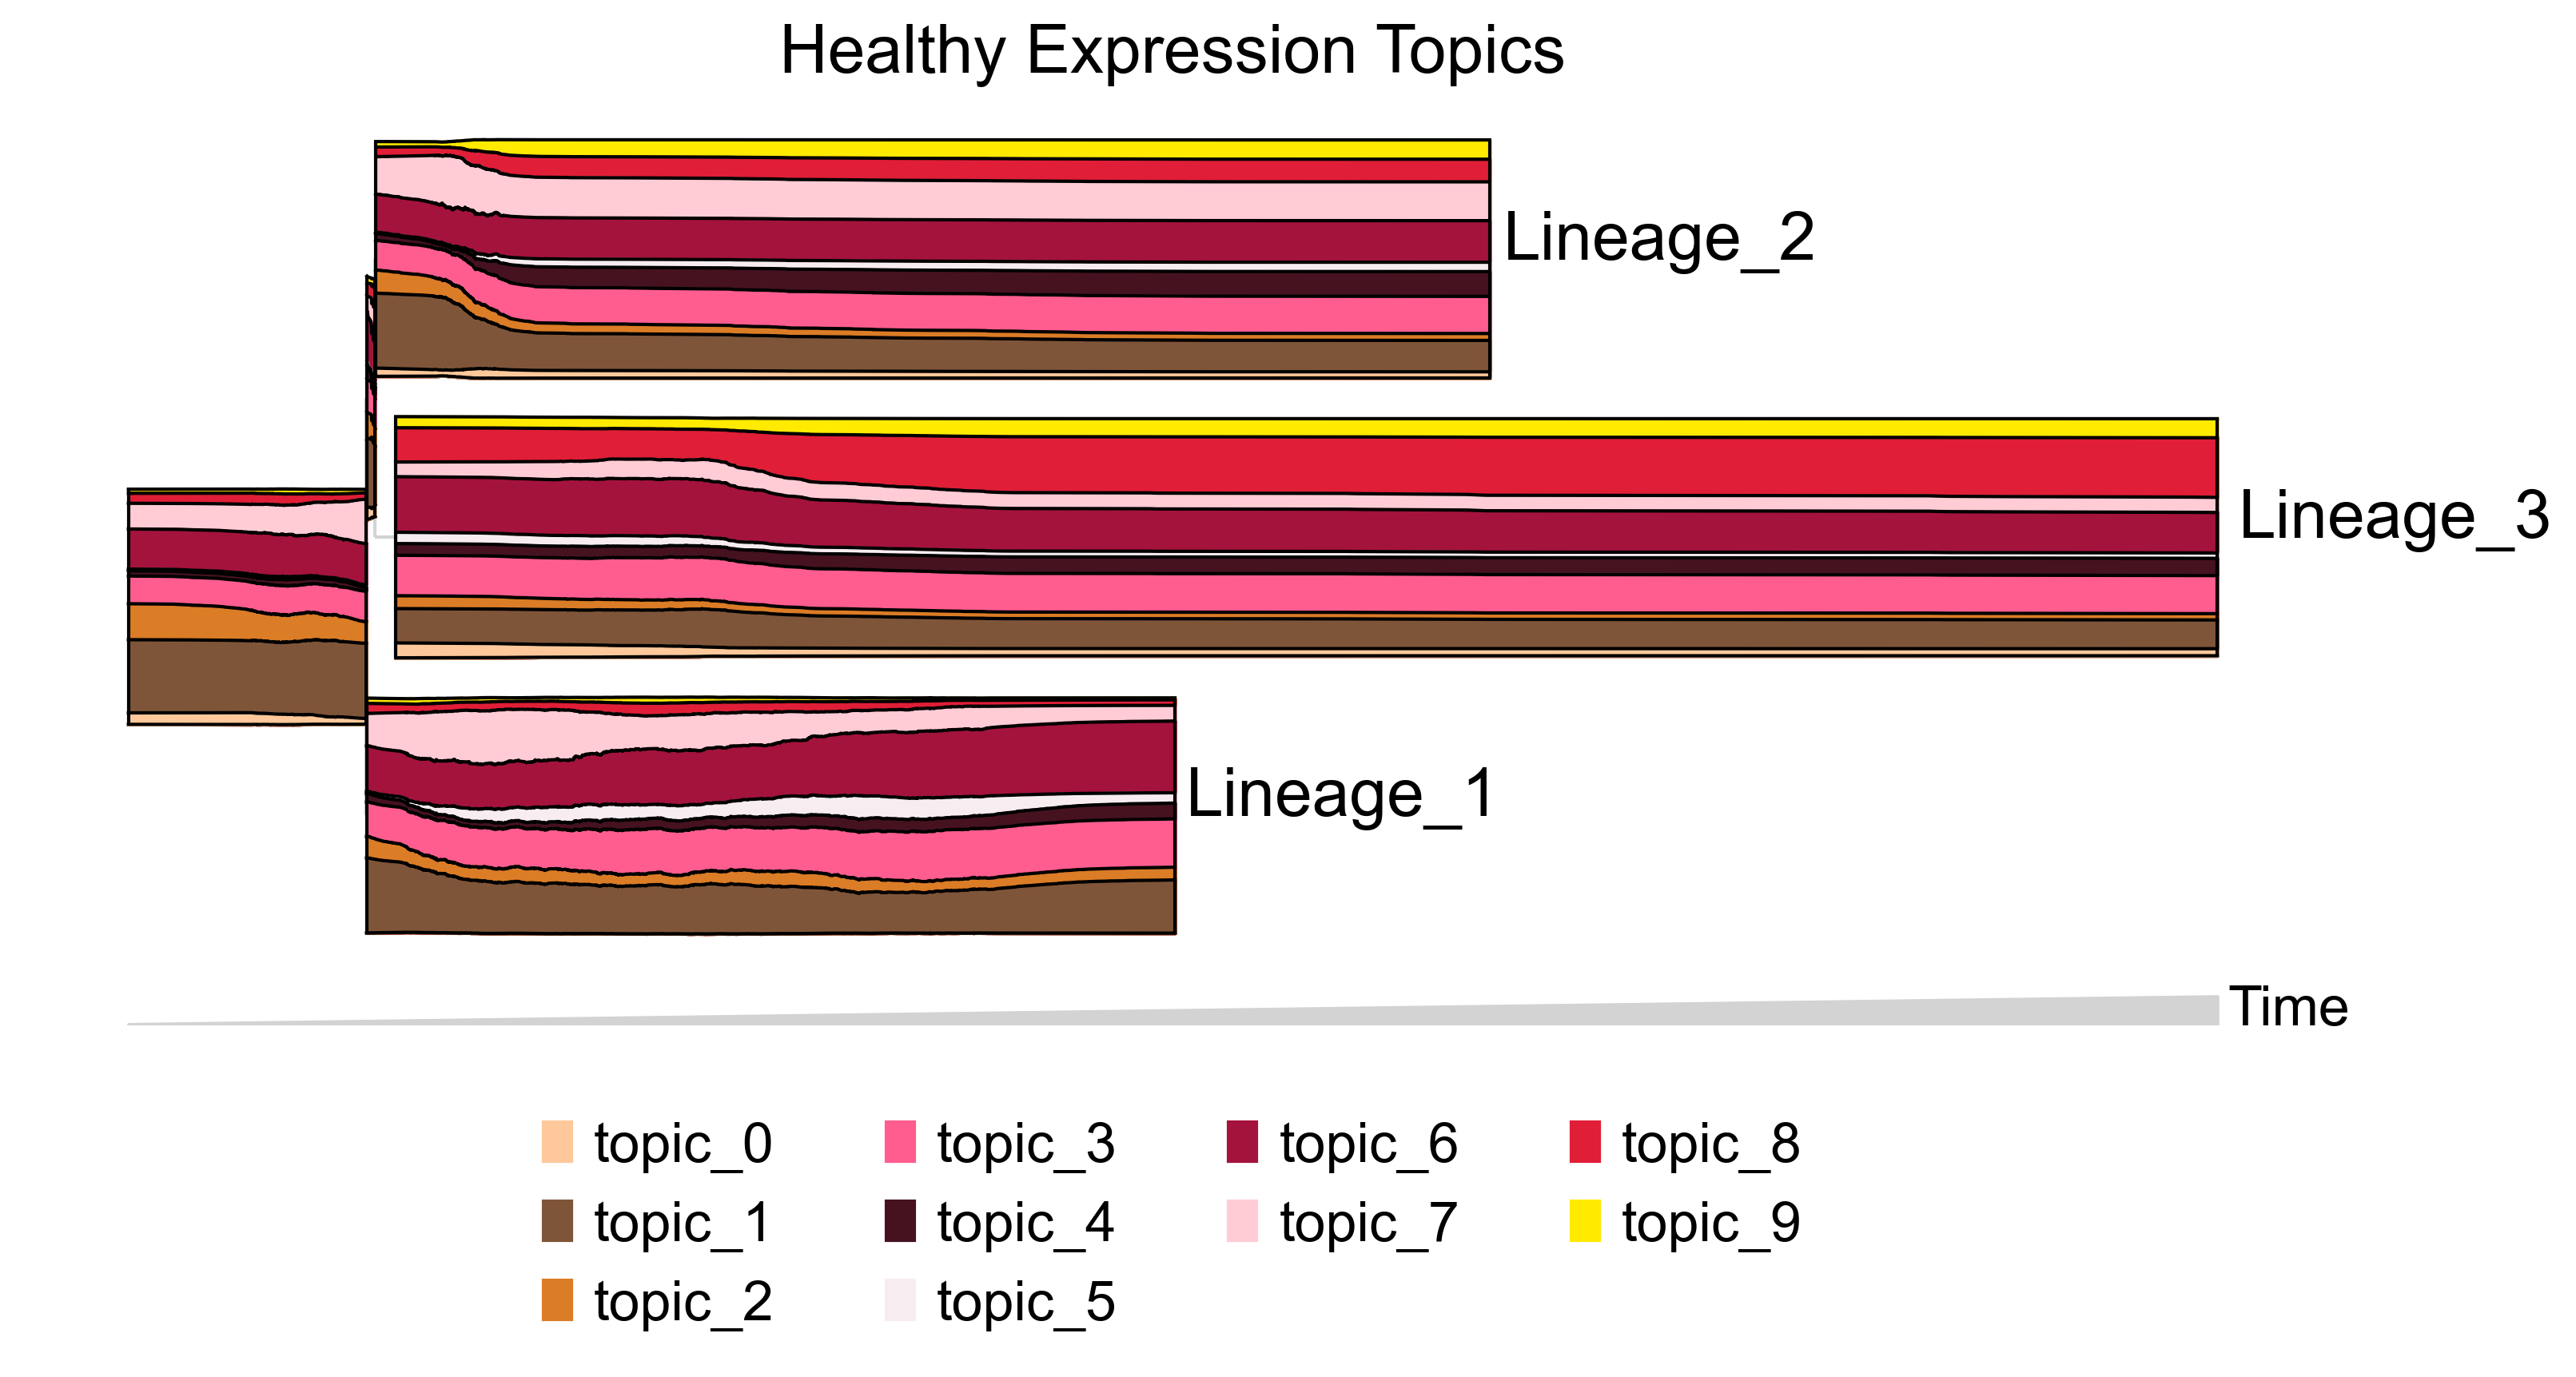

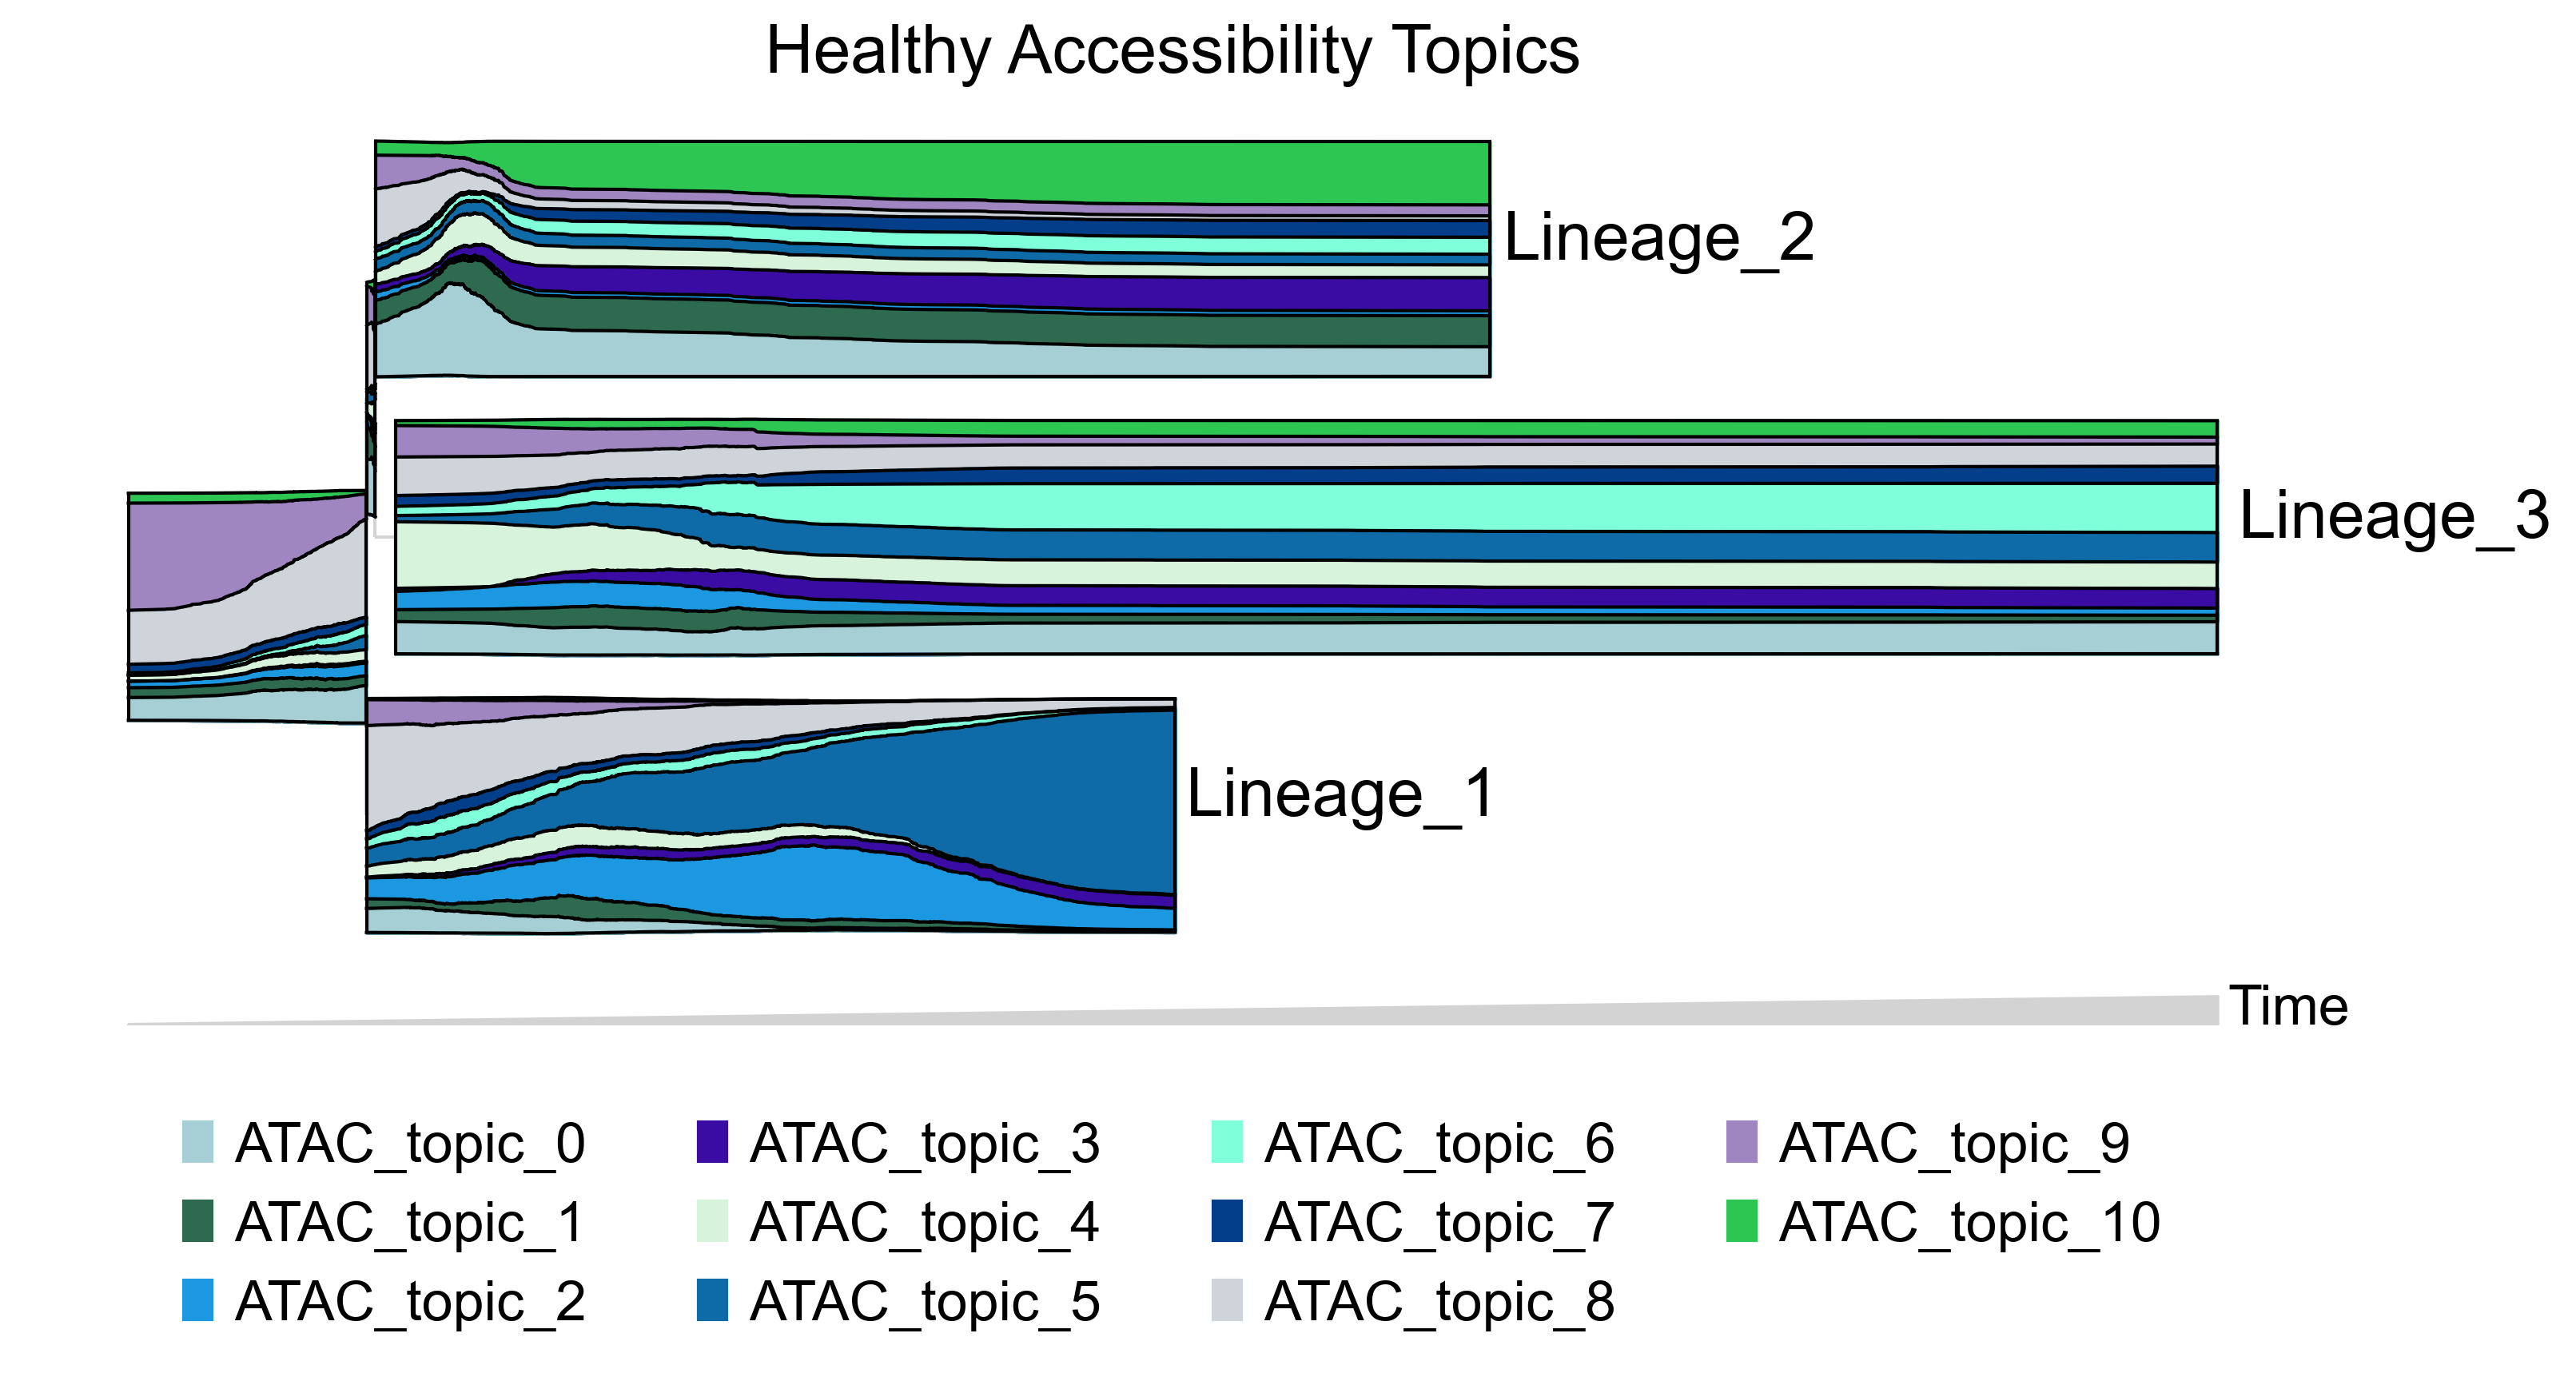

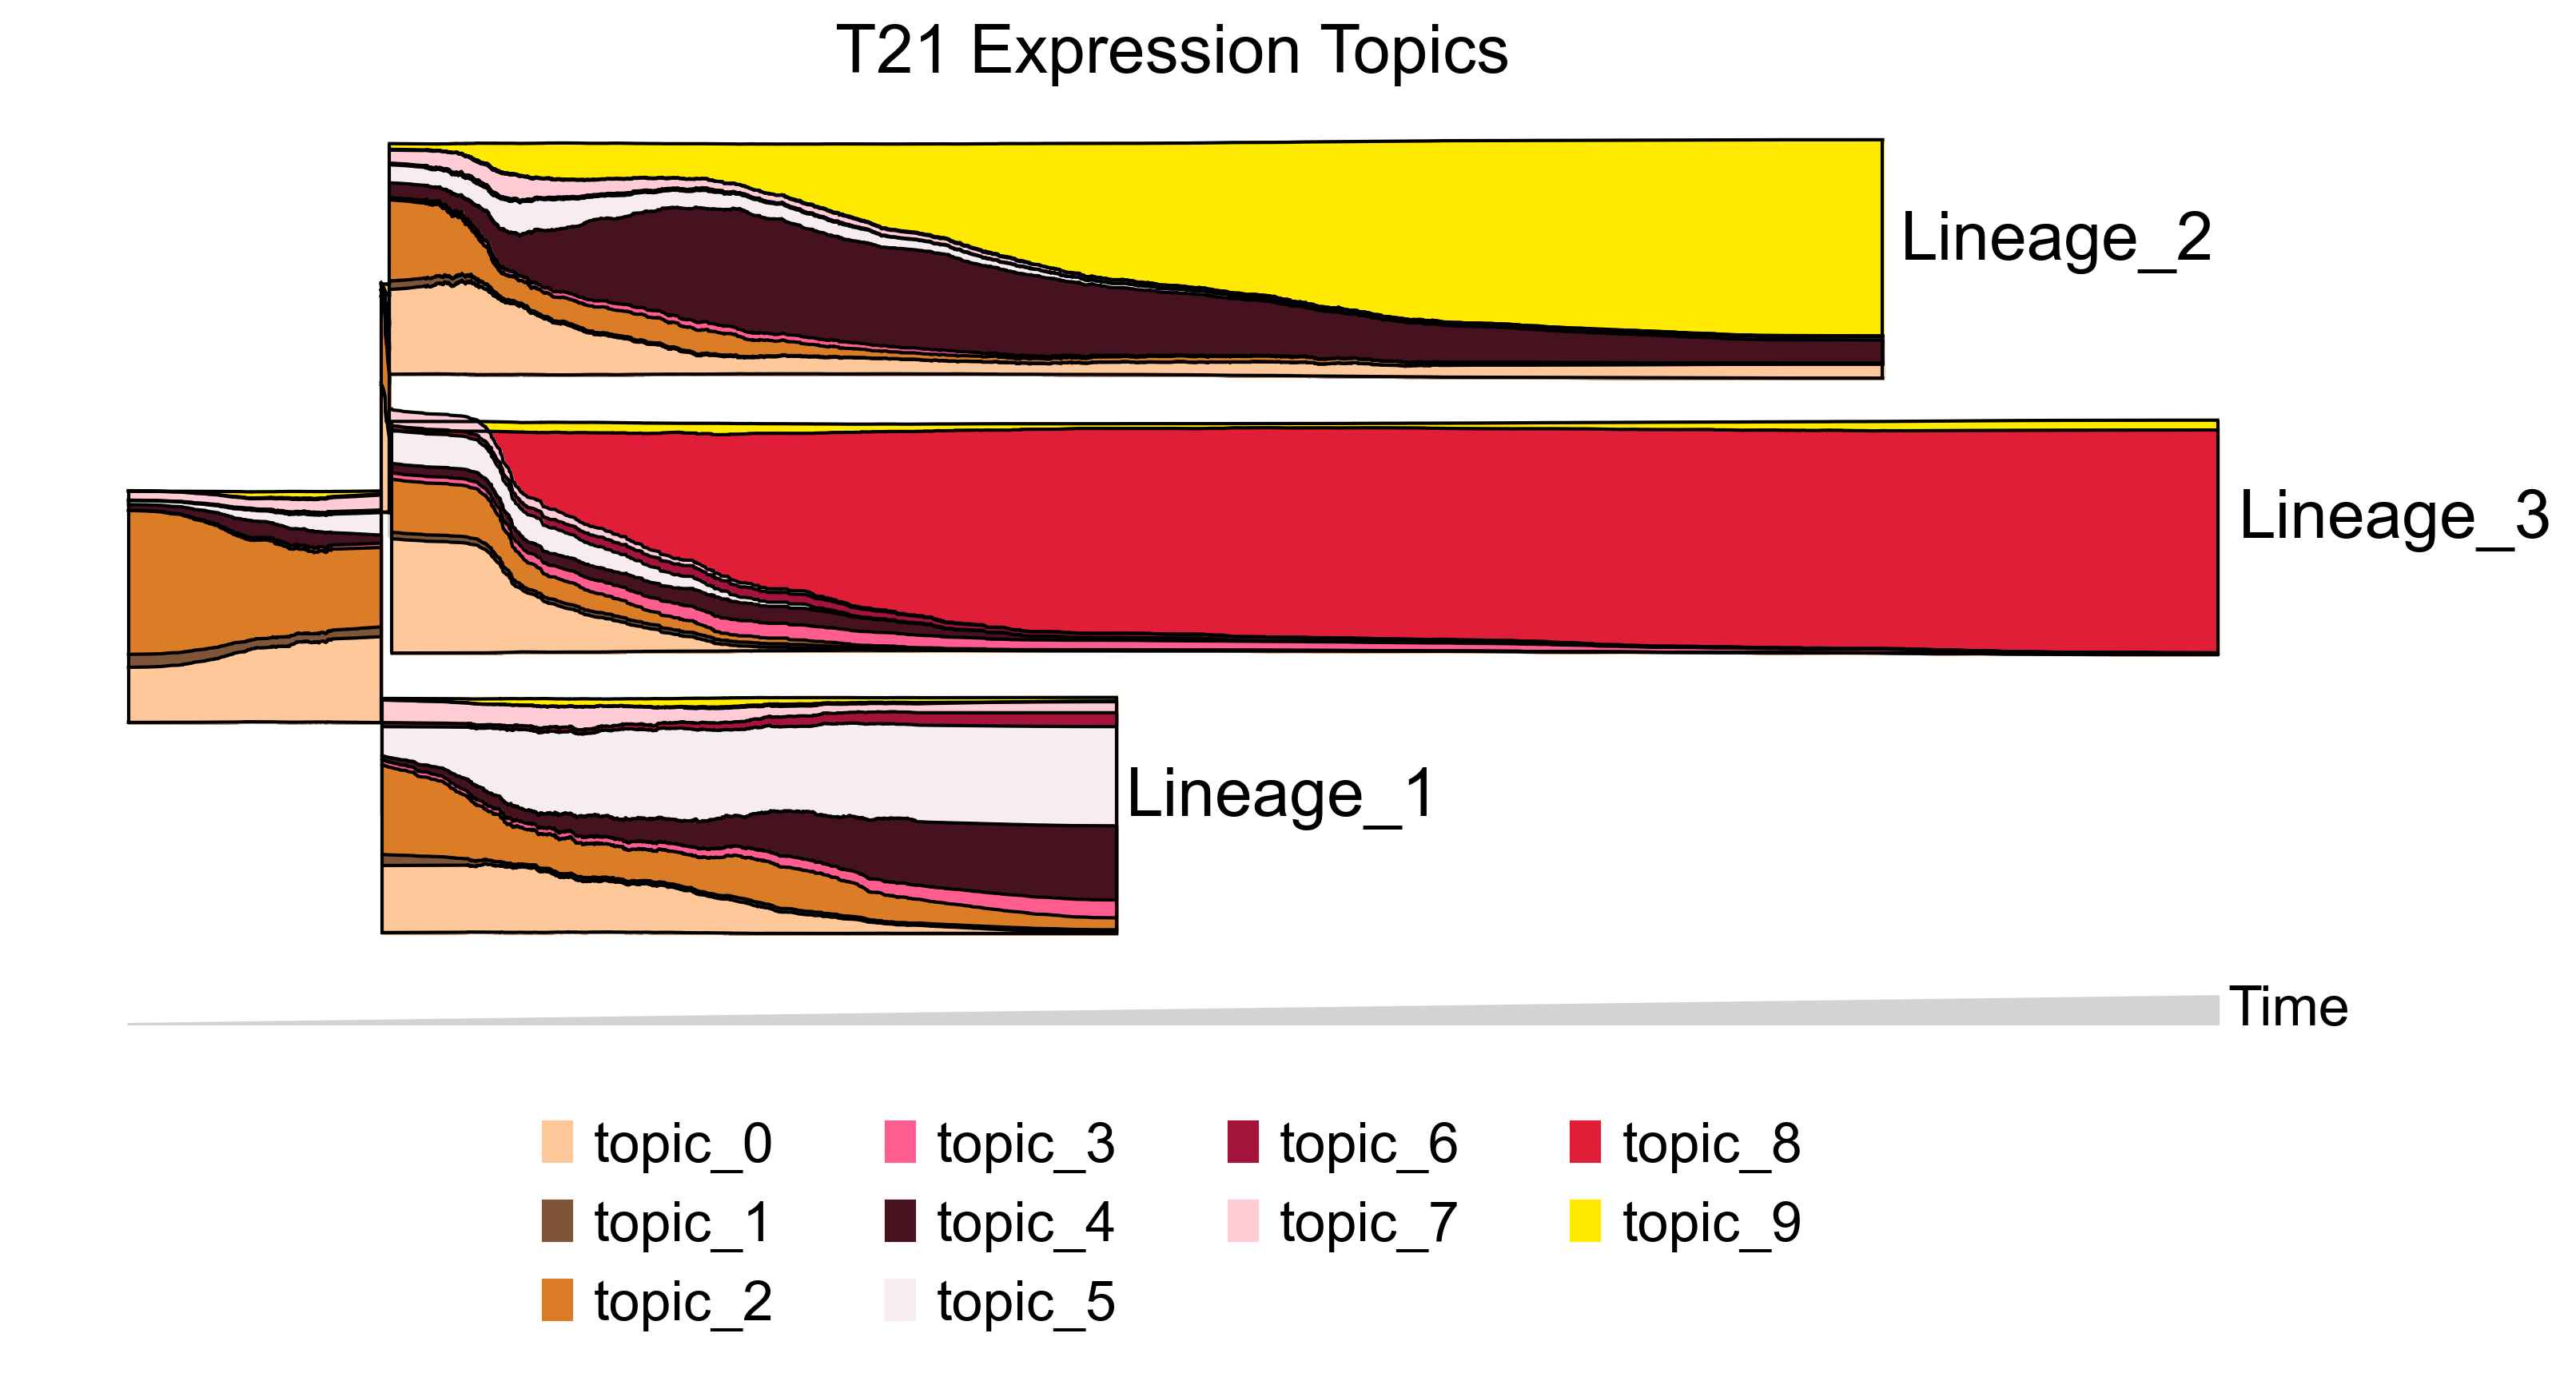

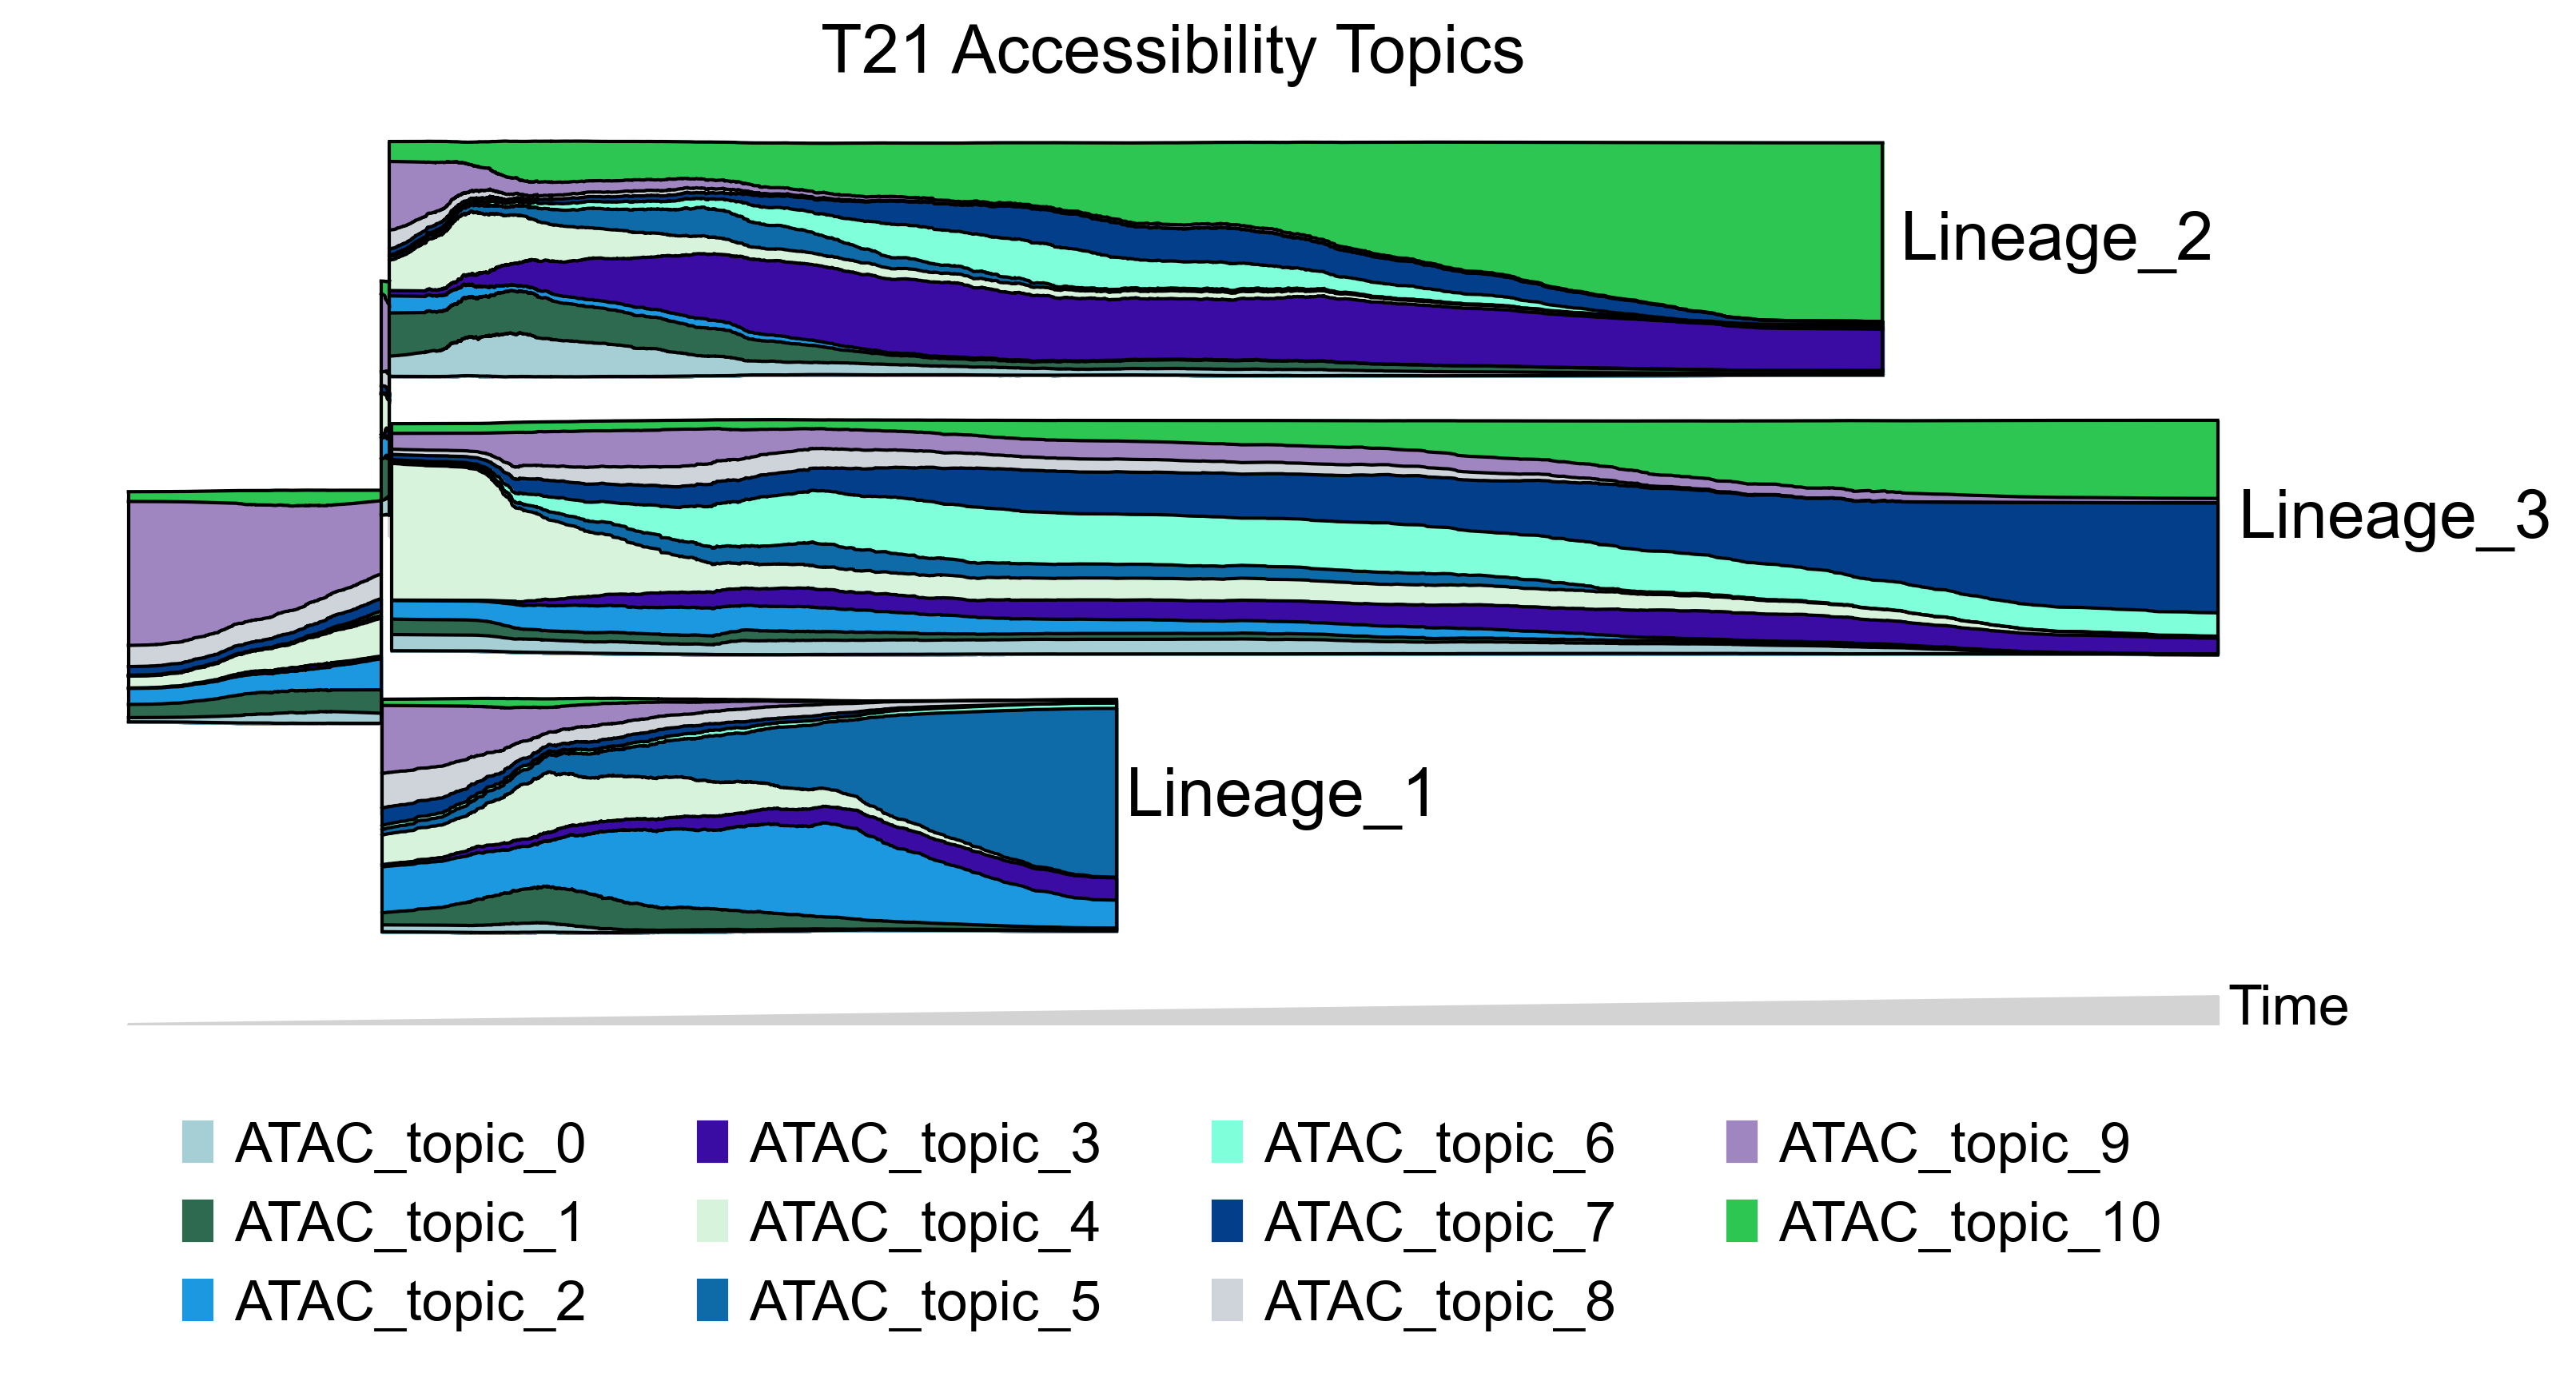

In [35]:
plot_kwargs = dict(hide_feature_threshold=0.03, linewidth=1, max_bar_height=0.9,
                     legend_cols=4, figsize = (11,6), log_pseudotime=False)


#dbb42c
#set specific cool and warm color pallete
warm_colors = ["#fec89a", "#7f5539", '#db7c26', '#ff5d8f', '#461220', 
               '#f7edf0', '#a4133c', '#ffccd5', '#e01e37', '#ffea00']

cool_colors = ['#a6cfd5','#2d6a4f', '#1b98e0', '#3a0ca3', '#d8f3dc', '#0e6ba8','#80ffdb',
               '#023e8a', '#ced4da', '#9f86c0', '#2dc653']



hdata = data[data.obs['sample']=='Healthy']
tdata = data[data.obs['sample']=='T21']
mira.pl.plot_stream(hdata, 
                    data = ['topic_' + str(i) for i in [0,1,2,3,4,5,6,7,8,9]],
                    title = 'Healthy Expression Topics',
                    palette=sns.color_palette(warm_colors),
                    window_size = 201, # warm tones
                    **plot_kwargs)
plt.savefig('Single_Cell/MIRA/figures/healthy_stream_expression.pdf')

mira.pl.plot_stream(hdata,
                    data = ['ATAC_topic_' + str(i) for i in [0,1,2,3,4,5,6,7,8,9,10]],
                    title = 'Healthy Accessibility Topics',
                    palette=sns.color_palette(cool_colors),
                    window_size = 201, #+ sns.color_palette('tab20')[::1], # cool tones
                    **plot_kwargs)
plt.savefig('Single_Cell/MIRA/figures/healthy_stream_accesibility.pdf')

mira.pl.plot_stream(tdata,
                    data = ['topic_' + str(i) for i in [0,1,2,3,4,5,6,7,8,9]],
                    title = 'T21 Expression Topics',
                    palette=sns.color_palette(warm_colors),
                    window_size = 201, # warm tones
                    **plot_kwargs)
plt.savefig('Single_Cell/MIRA/figures/t21_stream_expression.pdf')

mira.pl.plot_stream(tdata,
                    data = ['ATAC_topic_' + str(i) for i in [0,1,2,3,4,5,6,7,8,9,10]],
                    title = 'T21 Accessibility Topics',
                    palette=sns.color_palette(cool_colors),
                    window_size = 201, # cool tones
                    **plot_kwargs)
plt.savefig('Single_Cell/MIRA/figures/t21_stream_accesibility.pdf')
plt.show()

In [36]:
#get the comparison between the RNA topics and the ATAC topics between healthy and Ts21
#read in the ATAC model as well as the ATAC data 
atc_model = mira.topics.AccessibilityTopicModel.load('Single_Cell/MIRA/ATAC_topic_model_HSCs_only_T21_healthy.pth')
atc_model

INFO:mira.topic_model.base:Moving model to CPU for inference.
INFO:mira.topic_model.base:Moving model to device: cpu


AccessibilityTopicModel(
  (decoder): Decoder(
    (beta): Linear(in_features=11, out_features=72541, bias=False)
    (bn): BatchNorm1d(72541, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (drop): Dropout(p=0.2, inplace=False)
  )
  (encoder): DANEncoder(
    (drop): Dropout(p=0.12390677670137941, inplace=False)
    (embedding): Embedding(45096, 128, padding_idx=0)
    (fc_layers): Sequential(
      (0): Sequential(
        (0): Linear(in_features=129, out_features=22, bias=True)
        (1): BatchNorm1d(22, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
)

In [37]:
atac = anndata.read_h5ad('Single_Cell/MIRA/ATAC_MIRA_input_HSCs_only.h5ad')
#filter
sc.pp.calculate_qc_metrics(atac, percent_top=None, log1p=False, inplace=True)

#remove peaks according to episcanpy tutorial
sc.pp.filter_genes(atac, min_cells=1)
atac.var['log_counts_cells'] = [np.log10(x) for x in atac.var['n_cells_by_counts']]
subset = atac.var[atac.var['log_counts_cells']>1]
subset['peak'] = subset.index
subset_peaks = list(subset['peak'])
to_keep = atac.var_names.isin(subset_peaks)
atac = atac[:,to_keep]

atac.raw = atac

#select endog
sc.pp.normalize_total(atac, target_sum=1e4)
sc.pp.log1p(atac)

sc.pp.highly_variable_genes(atac, min_disp = 0.05)
atac.var['exog'] = atac.var.highly_variable.copy()
atac.var['endog'] = atac.var.exog & (atac.var.dispersions_norm > 0.5)
atac.layers['counts'] = atac.raw.to_adata().X.copy()

In [38]:
atc_model.predict(atac)

Predicting latent vars:   0%|          | 0/13 [00:00<?, ?it/s]

INFO:mira.adata_interface.core:Added key to obsm: X_topic_compositions
INFO:mira.adata_interface.topic_model:Added cols: topic_0, topic_1, topic_2, topic_3, topic_4, topic_5, topic_6, topic_7, topic_8, topic_9, topic_10
INFO:mira.adata_interface.core:Added key to varm: topic_feature_compositions
INFO:mira.adata_interface.core:Added key to varm: topic_feature_activations
INFO:mira.adata_interface.topic_model:Added key to uns: topic_dendogram


In [39]:
rna = anndata.read_h5ad('Single_Cell/MIRA/MIRA_input_HSCs_only.h5ad')

#repeat the MIRA analysis
sc.pp.filter_genes(rna, min_cells=15)
rna.raw = rna
sc.pp.normalize_total(rna, target_sum=1e4)
sc.pp.log1p(rna)

#select the endogenous versus exogenous genes
sc.pp.highly_variable_genes(rna, min_disp = 0.01)
rna.var['exog'] = rna.var.highly_variable.copy()
rna.var['endog'] = rna.var.exog & (rna.var.dispersions_norm > 0.5)
rna.layers['counts'] = rna.raw.to_adata().X.copy()

In [40]:
model = mira.topics.ExpressionTopicModel.load('Single_Cell/MIRA/RNA_topic_model_HSC_only_T21_healthy.pth')
model.predict(rna)

INFO:mira.topic_model.base:Moving model to CPU for inference.
INFO:mira.topic_model.base:Moving model to device: cpu


Predicting latent vars:   0%|          | 0/13 [00:00<?, ?it/s]

INFO:mira.adata_interface.core:Added key to obsm: X_topic_compositions
INFO:mira.adata_interface.topic_model:Added cols: topic_0, topic_1, topic_2, topic_3, topic_4, topic_5, topic_6, topic_7, topic_8, topic_9
INFO:mira.adata_interface.core:Added key to varm: topic_feature_compositions
INFO:mira.adata_interface.core:Added key to varm: topic_feature_activations
INFO:mira.adata_interface.topic_model:Added key to uns: topic_dendogram


In [42]:
#get the underlying data for violin plot cell wise mutual information
mira.tl.get_cell_pointwise_mutual_information(rna, atac)

INFO:mira.adata_interface.topic_model:Fetching key X_topic_compositions from obsm
INFO:mira.adata_interface.topic_model:Fetching key X_topic_compositions from obsm
INFO:mira.adata_interface.core:Added cols to obs: pointwise_mutual_information


In [63]:
#T21
rna_t21 = rna[rna.obs['sample']=='T21']
atac_t21 = atac[atac.obs['sample']=='T21']

mira.tl.get_cell_pointwise_mutual_information(rna_t21, atac_t21)

INFO:mira.adata_interface.topic_model:Fetching key X_topic_compositions from obsm
INFO:mira.adata_interface.topic_model:Fetching key X_topic_compositions from obsm
INFO:mira.adata_interface.core:Added cols to obs: pointwise_mutual_information


In [64]:
cross_correlation_t21 = mira.tl.get_topic_cross_correlation(rna_t21, atac_t21)

INFO:mira.adata_interface.topic_model:Fetching key X_topic_compositions from obsm
INFO:mira.adata_interface.topic_model:Fetching key X_topic_compositions from obsm


In [65]:
cross_correlation_t21

ATAC      Topic 0   Topic 1   Topic 2   Topic 3   Topic 4   Topic 5   Topic 6  \
RNA                                                                             
Topic 0  0.132498  0.263303  0.081928 -0.488600  0.601345 -0.273992 -0.315612   
Topic 1  0.224895  0.059644  0.059413 -0.242571  0.034484  0.000957 -0.161321   
Topic 2 -0.026856  0.223777  0.225284 -0.373290  0.136079 -0.096541 -0.275556   
Topic 3  0.001022 -0.121259  0.161348 -0.014365 -0.058693  0.429068  0.099981   
Topic 4  0.035858 -0.005580 -0.220050  0.658540 -0.383623  0.348649  0.096719   
Topic 5 -0.200366  0.150017  0.566804 -0.279945  0.221805  0.287268 -0.202789   
Topic 6 -0.078059 -0.035467  0.362613 -0.197140  0.034878  0.401100 -0.066664   
Topic 7  0.343774  0.113684 -0.027884 -0.153255  0.140301  0.035256 -0.116538   
Topic 8 -0.061723 -0.263465 -0.163522 -0.069138 -0.162583 -0.133891  0.331822   
Topic 9 -0.002809 -0.195170 -0.375696  0.578888 -0.304194 -0.162891  0.178874   

ATAC      Topic 7   Topic 8   Topic 9  Topic 10  
RNA                                              
Topic 0 -0.288890  0.051117  0.397318 -0.212227  
Topic 1 -0.194014  0.415547  0.303146 -0.212110  
Topic 2 -0.272905  0.294461  0.538541 -0.287521  
Topic 3 -0.078661  0.192723 -0.142034 -0.292166  
Topic 4 -0.128738 -0.182805 -0.330150  0.125196  
Topic 5 -0.240536  0.061995 -0.081142 -0.338358  
Topic 6 -0.171167  0.215472 -0.008816 -0.351181  
Topic 7 -0.200037  0.256572  0.027319 -0.144497  
Topic 8  0.559961  0.010988 -0.071147  0.086357  
Topic 9  0.133953 -0.369401 -0.339549  0.621175

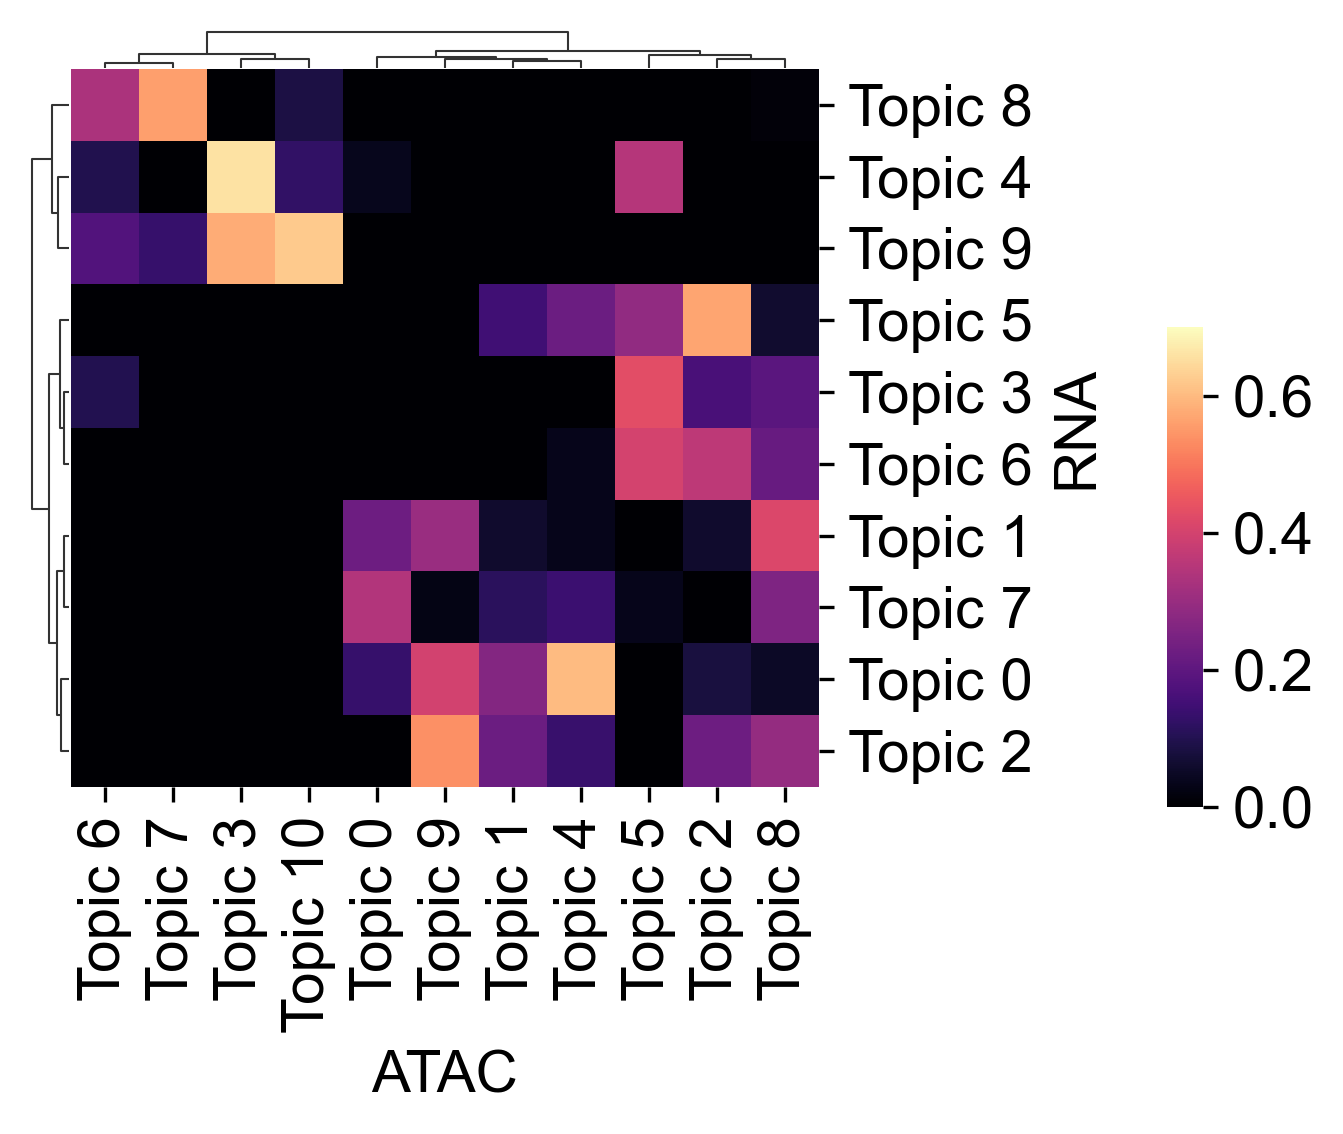

In [66]:
sns_plot = sns.clustermap(cross_correlation_t21,vmin = 0,vmax=0.7,
               cmap = 'magma', method='ward',cbar_pos=(1, .3, .03, .4),
               dendrogram_ratio=0.05, figsize=(4,4))

plt.savefig("Single_Cell/MIRA/figures/T21_cross_correlation.pdf")

In [67]:
#Healthy 
rna_healthy = rna[rna.obs['sample']=='Healthy']
atac_healthy = atac[atac.obs['sample']=='Healthy']

cross_correlation_healthy = mira.tl.get_topic_cross_correlation(rna_healthy, atac_healthy)
cross_correlation_healthy

INFO:mira.adata_interface.topic_model:Fetching key X_topic_compositions from obsm
INFO:mira.adata_interface.topic_model:Fetching key X_topic_compositions from obsm


ATAC      Topic 0   Topic 1   Topic 2   Topic 3   Topic 4   Topic 5   Topic 6  \
RNA                                                                             
Topic 0  0.041569  0.218011 -0.041510 -0.134065  0.327880 -0.337155 -0.188288   
Topic 1  0.223951 -0.067490 -0.219953 -0.112926 -0.172873 -0.171608 -0.068820   
Topic 2 -0.005647  0.045221 -0.013451 -0.157640 -0.019776 -0.167606 -0.147828   
Topic 3 -0.284350 -0.034692  0.250155  0.085586 -0.024279  0.318668  0.032242   
Topic 4 -0.155905  0.064029  0.103148  0.167162  0.072215  0.093996  0.044113   
Topic 5 -0.302182 -0.019161  0.389029 -0.016618  0.022416  0.232482 -0.035737   
Topic 6 -0.271661  0.068831  0.270809  0.073439 -0.000135  0.275166 -0.150509   
Topic 7  0.235712 -0.107406 -0.213239 -0.007504 -0.120100 -0.046526  0.211029   
Topic 8  0.006928  0.094489 -0.033608  0.058744  0.291516 -0.170024 -0.014688   
Topic 9  0.140338  0.090961 -0.181466  0.138455  0.246926 -0.210047  0.095285   

ATAC      Topic 7   Topic 8   Topic 9  Topic 10  
RNA                                              
Topic 0  0.035458 -0.091689  0.363750  0.156175  
Topic 1 -0.110849  0.322041  0.159440  0.003114  
Topic 2  0.000669  0.145088  0.286149 -0.001194  
Topic 3 -0.025893 -0.142649 -0.203486 -0.120881  
Topic 4  0.129915 -0.219267 -0.083835  0.041422  
Topic 5  0.089378 -0.167115 -0.136340 -0.142807  
Topic 6 -0.146221 -0.173016 -0.080219 -0.056337  
Topic 7  0.029461  0.128945 -0.130868 -0.025216  
Topic 8  0.117522 -0.179188  0.097415  0.158519  
Topic 9  0.168935 -0.190328  0.010782  0.253028

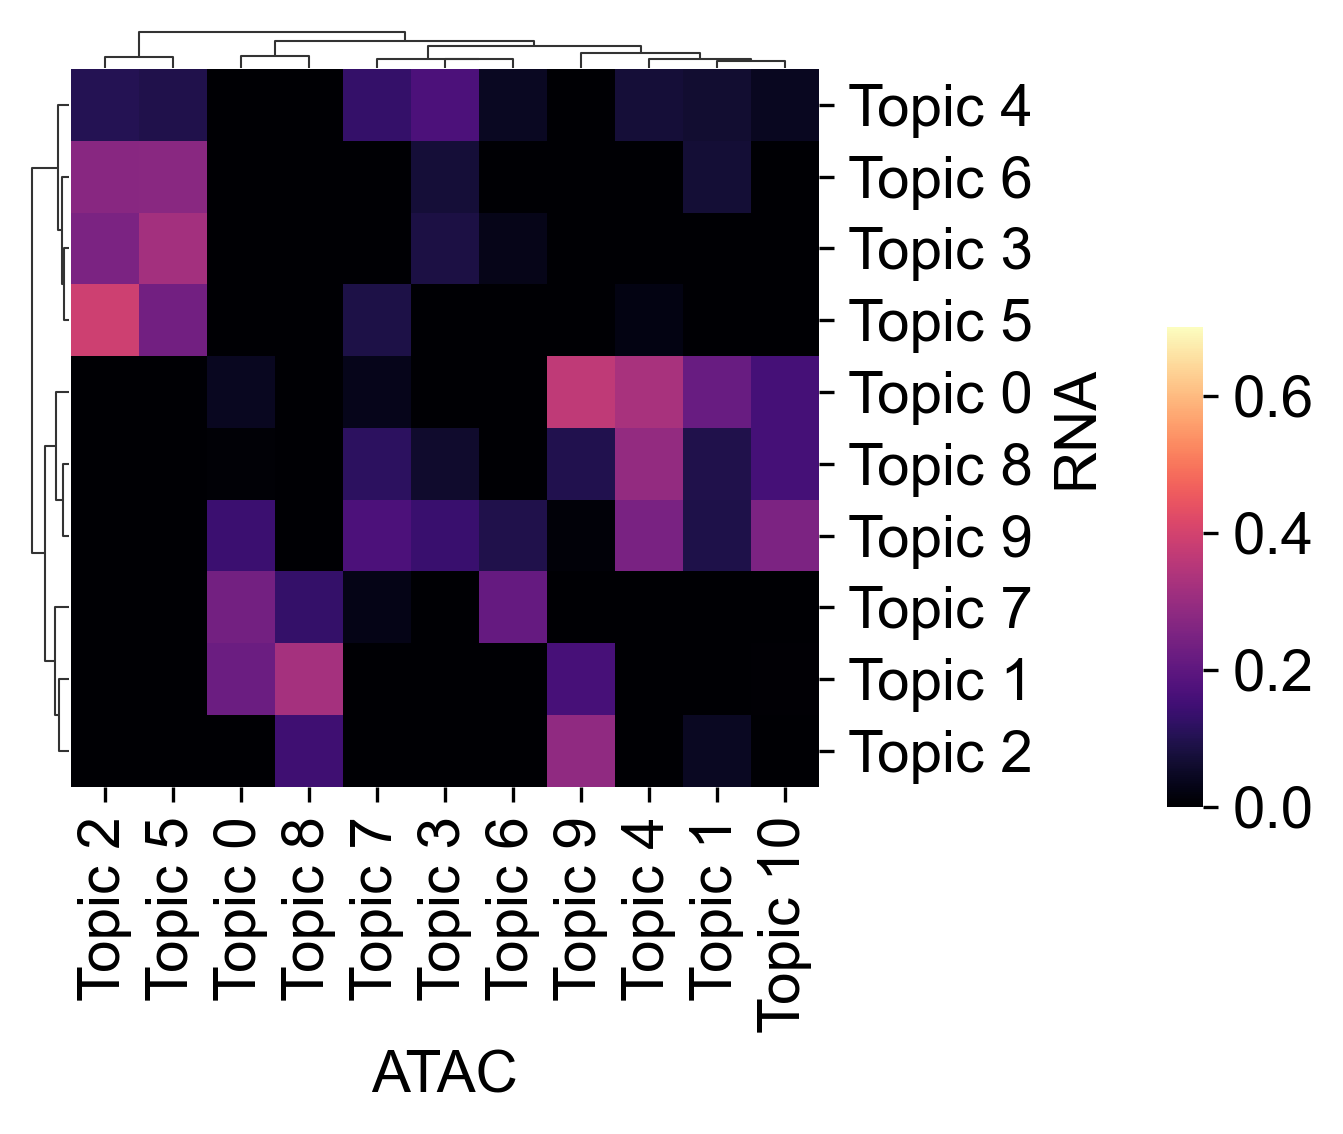

In [68]:
sns_plot = sns.clustermap(cross_correlation_healthy, vmin = 0, vmax=0.7,
               cmap = 'magma', method='ward',cbar_pos=(1, .3, .03, .4),
               dendrogram_ratio=0.05, figsize=(4,4))

plt.savefig("Single_Cell/MIRA/figures/Healthy_cross_correlation.pdf")

In [116]:
#data with lineage information to build lineage tree graphs
data = anndata.read_h5ad('Single_Cell/Joint_representation_HSCs.lineages.pseudotime.h5ad')
rna_t21 = data[data.obs['sample']=='T21']
rna_healthy = data[data.obs['sample']=='Healthy']


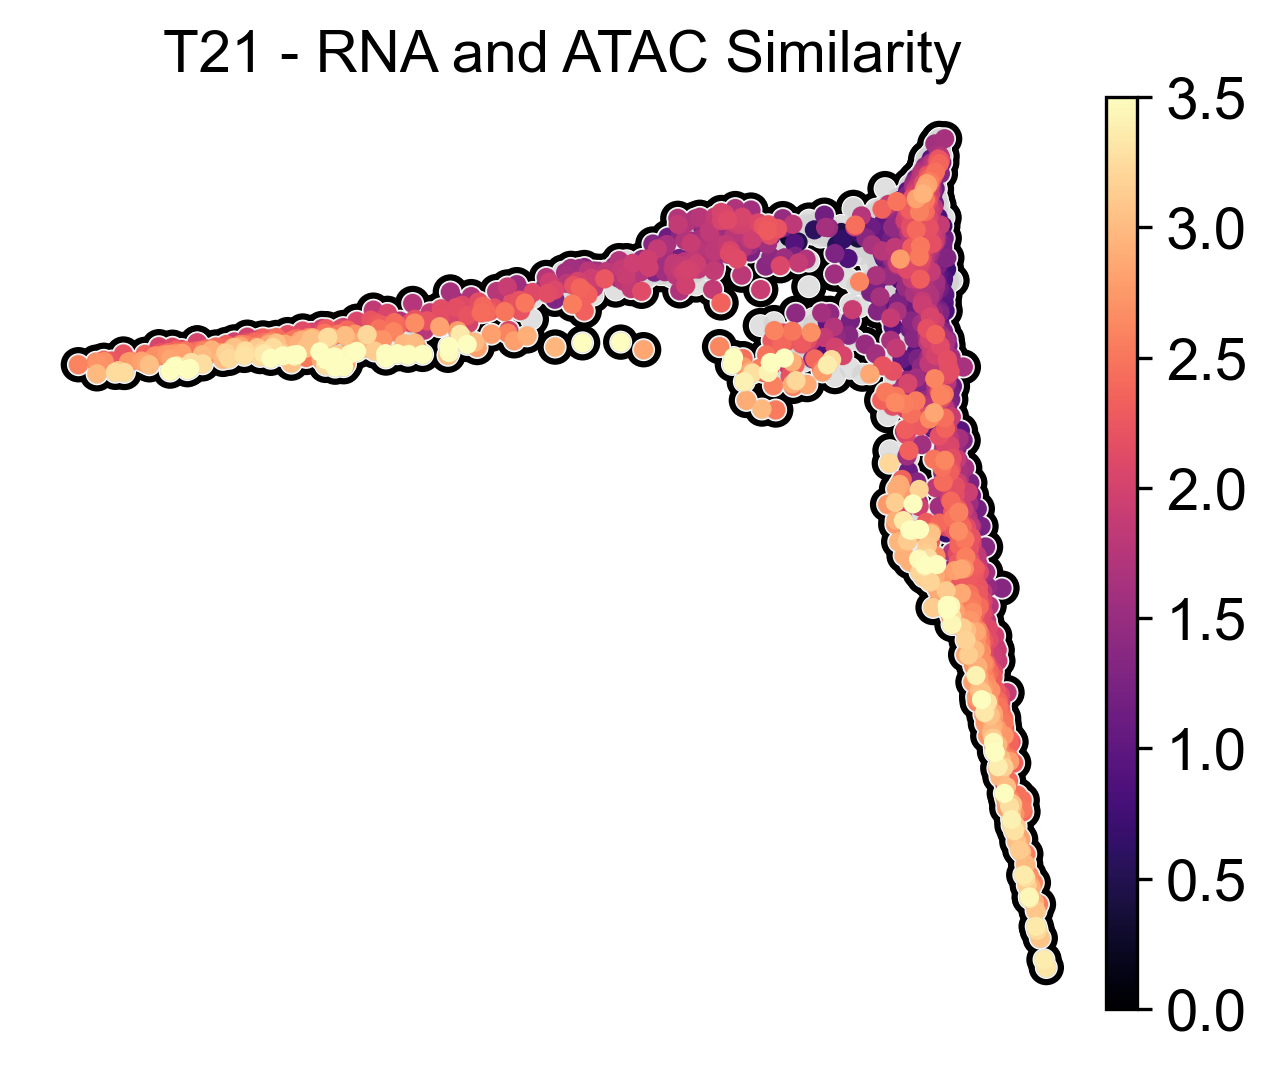

In [131]:
sc.set_figure_params(dpi=300, figsize=(5,4), dpi_save=300)
ax = sc.pl.umap(data, size=100, show=False, add_outline=True)

sc.pl.umap(rna_t21, color = 'pointwise_mutual_information', ax = ax, vmin = 0,
           title='T21 - RNA and ATAC Similarity', save='Cellwise_mutual_information_T21.pdf',
          color_map='magma', frameon=False, add_outline=False, vmax = 3.5, size = 85)



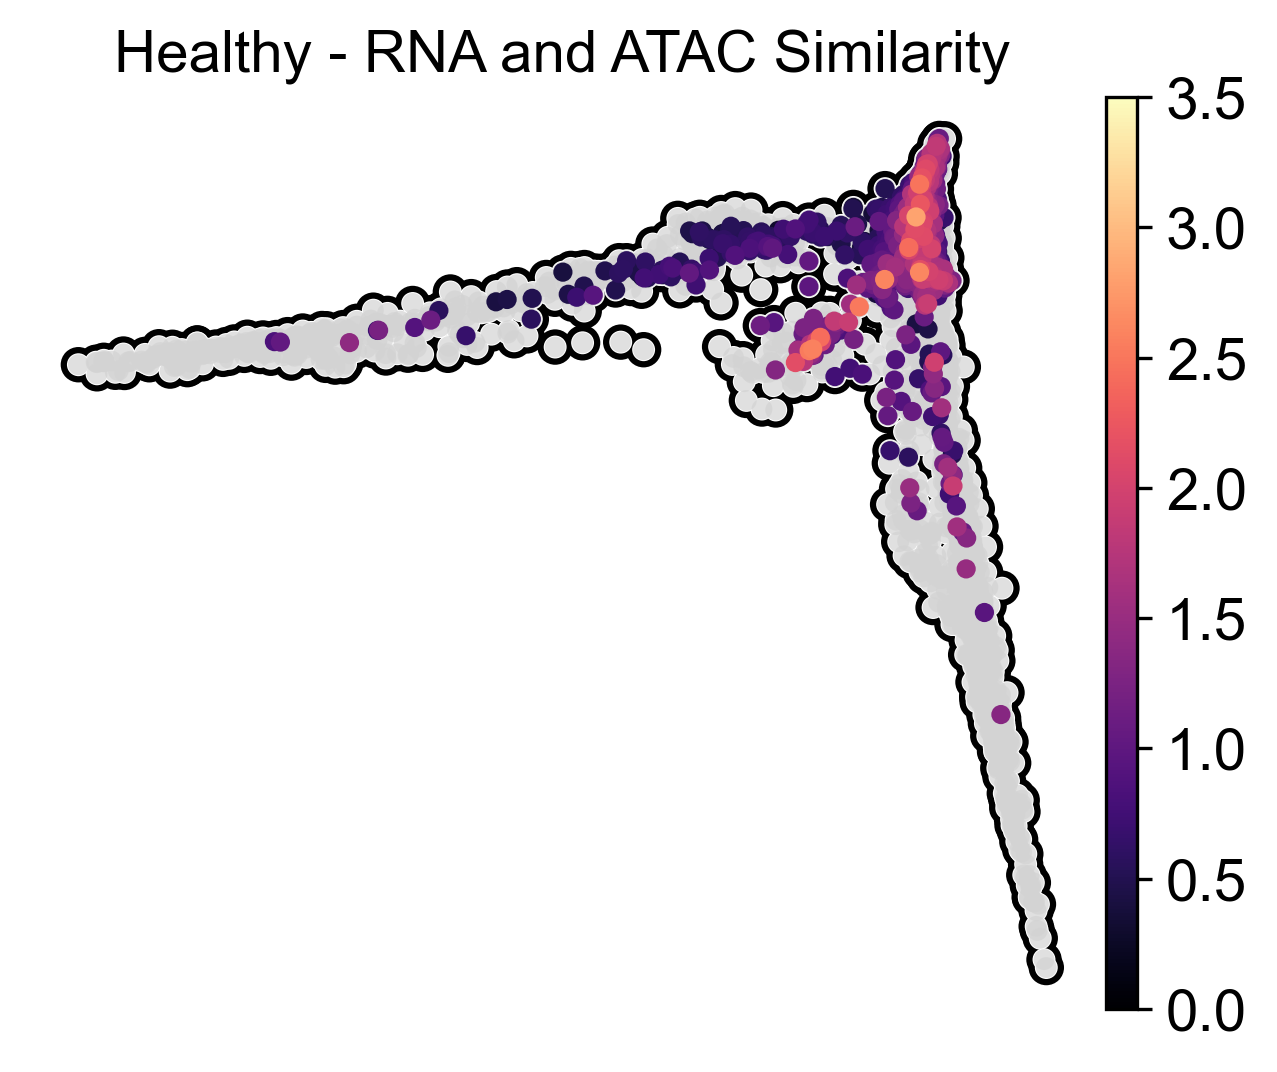

<Figure size 1500x1200 with 0 Axes>

In [132]:
sc.set_figure_params(dpi=300, figsize=(5,4), dpi_save=300)
ax = sc.pl.umap(data, size=100, show=False, add_outline=True)

sc.pl.umap(rna_healthy, color = 'pointwise_mutual_information', ax = ax, vmin = 0,
           title='Healthy - RNA and ATAC Similarity', show=True,save='Cellwise_mutual_information_Healthy.pdf',
          color_map='magma', frameon=False, add_outline=False, vmax = 3.5, size = 85)


plt.savefig('Single_Cell/MIRA/figures/Cellwise_mutual_information_UMAP_Healthy.pdf', dpi=300)


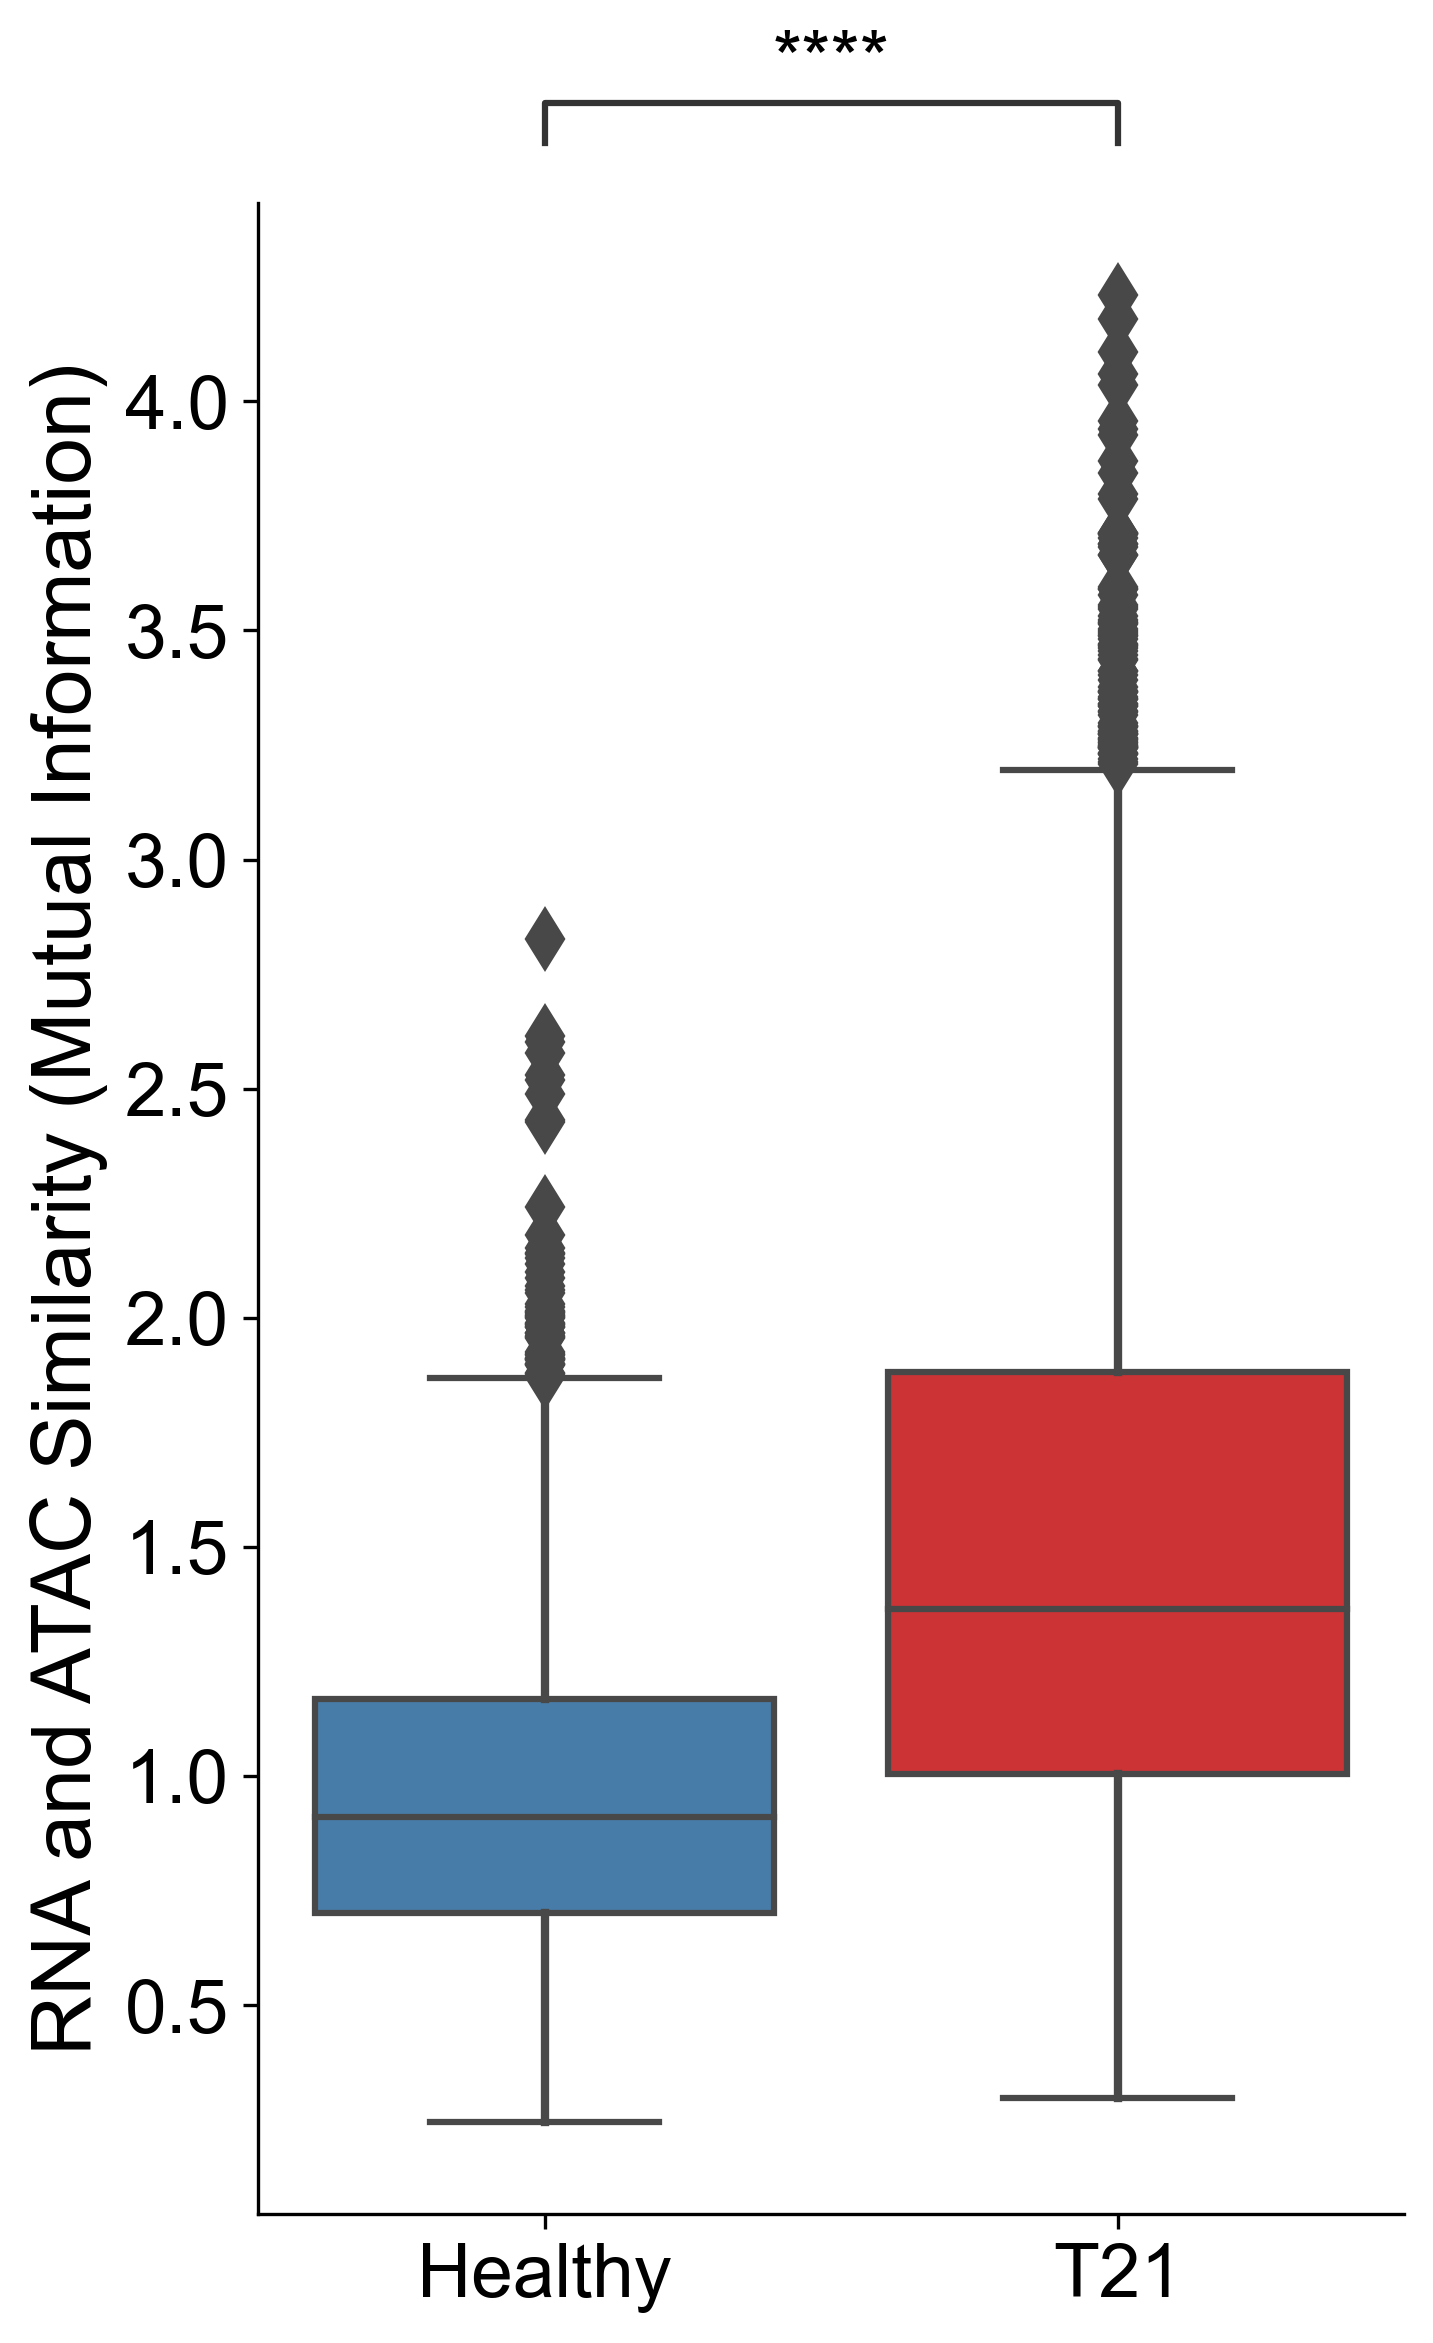

In [114]:
df_joint = pd.DataFrame(data.obs)
df_joint['Condition'] = df_joint['sample'].astype('str')
#save the raw data
df_joint_sv = df_joint[['dataset','Condition','pointwise_mutual_information']]
df_joint_sv.to_csv('Single_Cell/MIRA/figures/Cell_mutual_information_ATAC_RNA_similarity.csv')

#generate violin plots to compare
colors_list = ['#377EB8', '#E41A1C']

hue_plot_params = {
    'data':      df_joint_sv,
    'x':         'Condition',
    'y':         'pointwise_mutual_information',
    "palette":   colors_list
}

pairs = (
    [('T21'), ('Healthy')], 
)

               
fig = plt.figure(figsize=(5, 8))

ax = sns.boxplot(x=df_joint_sv.Condition, y=df_joint_sv.pointwise_mutual_information, data=df_joint_sv, palette=colors_list,
                whiskerprops={'linewidth': 2}, flierprops = dict( markersize=10))

handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles=handles[0:], labels=labels[0:], loc="upper left", fontsize=18)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18)


annotator = Annotator(ax, pairs, **hue_plot_params)  
annotator.configure(test="Mann-Whitney", comparisons_correction="BH", fontsize=18,
                    verbose=False, loc='outside').apply_and_annotate()


ax.set_ylabel("RNA and ATAC Similarity (Mutual Information)", fontsize=20)
ax.set_xlabel("", fontsize=22, fontweight="bold")
ax.xaxis.labelpad = 22
sns.despine()

ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 18)
ax.grid(False)
plt.tight_layout()
plt.savefig('Single_Cell/MIRA/figures/Cellwise_mutual_information_Healthy_T21.pdf', dpi=300)
plt.show()
